In [3]:
from tensorflow.python.client import device_lib   # 이는 나중에 GPU를 사용하고자 할때 필요함.
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10133868504546414333
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9063301120
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13773295143426600582
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [6]:
import pandas as pd

df = pd.read_excel("Data for headed bars_for DataFrame_220725.xlsx", skiprows = 17, engine = 'openpyxl')
df = pd.DataFrame(df, columns = ["No.", "Author", "Year", "Test type", "Remark", "Specimen", "fy", "Ld", "fcm", "db", "b", "cos,avg",
                                 "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "Fsu at La, test", "dtr", "Ntr", "st"]) # st 제거시
df

FileNotFoundError: [Errno 2] No such file or directory: 'Data for headed bars_for DataFrame_220725.xlsx'

In [ ]:
y= df["Fsu at La, test"]
y

In [ ]:
df.info()   # dtr, Ntr 데이터가 상대적으로 모자라니, 이 둘을 feature에서 제거함.

In [ ]:
#X = df[["fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "dtr", "Ntr", "st"]] # 최대변수 사용
#X = df[["fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "st"]] # 누락값 많은 변수 미사용
# Test type - One-hot encoding
X = df[["Test type", "fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "st"]] # 범주형 데이터: Test type 포함
print(X["Test type"].value_counts()) # 범주 갯수 확인

In [ ]:
X = pd.get_dummies(data = X, columns = ["Test type"], prefix = "Test_type") # One-hot Endcoding 실행 -> (0, 0, 0, 1, 0), (1, 0, 0, 0, 0), ...
X

In [ ]:
y2 = y[~y.isnull()]
y2

In [ ]:
X = X[~y.isnull()]
X

In [ ]:
# X.fillna(0, inplace = True)   # 빈 데이터를을 모두 0으로 채우는 것은 잘못된 결과를 주어서 위험합니다. 차라리 다음과 같이 데이터를 없애는 게 낫습니다.
pd.options.display.max_rows=None

X.dropna(inplace = True)
X


In [ ]:
y2 = y2[X.index] # 목표값도 X와 동일하게 indexing
y2

In [ ]:
# y2 = 0인 값을 제거. 
y2 = y2.loc[(y2 != 0)]
y2

In [ ]:
X = X.loc[y2.index] # y=0인 index의 X값도 제거
X

In [ ]:
##학습과 실험 데이터를 분류하고 train과 valid 데이터를 분류한뒤

In [ ]:
# Train, Valid, Test Set으로 분류

In [ ]:
# 1. Train + Valid : Test  = 0.9 : 0.1 --> 먼저 9:1로 나누고

In [ ]:
from sklearn.model_selection import train_test_split

tf.random.set_seed(142)

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.20, random_state=142)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# 2. Train : Valid = 8: 2  --> 9중 20%를 valid로 가져옴

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20,random_state=142)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

NameError: name 'train_test_split' is not defined

In [8]:
## X변수들을 MinMaxScaler로 스케일링을 진행하였습니다.
## --> Y도 스케일링 하여야 합니다.

In [9]:
X_train.shape()

NameError: name 'X_train' is not defined

In [22]:
print(type(X_train))
print(type(X_valid))
print(type(X_test))
print(type(y_train))
print(type(y_valid))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler


scX = MinMaxScaler()                    # X의 scaler 정의
X_train_scaled = scX.fit_transform(X_train)    
X_valid_scaled = scX.transform(X_valid)
X_test_scaled = scX.transform(X_test)

scY = MinMaxScaler()                    # y의 scaler 정의
y_train_scaled = scY.fit_transform(y_train.values.reshape(-1,1)) # y_train.values.reshape(-1,1) 는 Pandas Series를 조작하여 차원조절
y_valid_scaled = scY.transform(y_valid.values.reshape(-1,1))
y_test_scaled = scY.transform(y_test.values.reshape(-1,1))

In [24]:
X_train

,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam
291,799.310345,368.300,38.413793,25.400,429.26,63.50,76.200000,66.886667,4.0,260.350000,10.100000,76.200,0,1,0,0,0
4,517.500000,285.750,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,50.800000,9.395954,127.000,0,0,0,0,1
325,889.655172,309.118,85.241379,25.400,381.00,63.50,76.200000,50.800000,4.0,260.350000,10.100000,309.118,0,1,0,0,0
384,931.034483,304.800,27.310345,35.814,543.56,60.96,93.980000,350.012000,2.0,508.000000,4.800000,203.200,0,1,0,0,0
322,889.655172,309.118,83.034483,25.400,386.08,66.04,73.660000,88.900000,3.0,260.350000,5.100000,76.200,0,1,0,0,0
395,889.655172,256.540,33.655172,25.400,444.50,68.58,80.010000,256.540000,2.0,508.000000,5.100000,127.000,0,1,0,0,0
61,433.000000,381.000,28.000000,36.000,215.90,89.95,50.800000,0.000000,1.0,83.600000,2.560000,252.000,1,0,0,0,0
282,827.586207,365.252,37.379310,25.400,434.34,64.77,85.090000,254.000000,2.0,260.350000,10.500000,76.200,0,1,0,0,0
396,889.655172,252.476,33.655172,25.400,439.42,66.04,82.550000,256.540000,2.0,508.000000,10.100000,127.000,0,1,0,0,0
415,799.310345,435.102,74.896552,35.814,556.26,71.12,99.060000,342.392000,2.0,508.000000,5.500000,435.102,0,1,0,0,0


In [25]:
# sns.pairplot(data=X_train)

In [26]:
# sns.distplot(y_train_scaled)

In [27]:
##층을 여기서 더 추가하거나 하여도 오히려 성능이 더 떨어지는 결과가 나옵니다.
# Set random seed
tf.random.set_seed(42)

# 1. Create a model  --> 일단 현재 네트워크 사용: 최종 네트워크는 실험을 통해 결정(성능 vs 비용 비교하여 효율적인 방향으로 설정)
model_1 = tf.keras.Sequential([
           tf.keras.layers.Dense(3000, activation='relu'),
           tf.keras.layers.Dense(1750, activation='relu'),
           tf.keras.layers.Dense(625, activation='relu'),
           tf.keras.layers.Dense(100, activation='relu'),
           tf.keras.layers.Dense(1, activation='linear')
])

# 2. Comile the model
model_1.compile(loss=tf.keras.losses.mse,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['mse'])

# 3. Fit the model
history = model_1.fit(X_train_scaled, 
                      y_train_scaled, 
                      epochs=1000,    # Load가 크지 않은 문제이므로, 충분히 학습할 것(즉, Underfitting이 되지 않도록 할 것). 
                      verbose = 1,
                      # 단, Overfitting이 발생하면 더이상 학습할 필요가 없음. 
                      #validation_split = 0.1)
                      validation_data=(X_valid_scaled, y_valid_scaled))

Epoch 1/500
8/8 [==============================] - 3s 18ms/step - loss: 0.1054 - mse: 0.1054 - val_loss: 0.0431 - val_mse: 0.0431
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 3/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 4/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 5/500
8/8 [==============================] - 1s 192ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 8/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0139 - mse: 0.0139 - 

8/8 [==============================] - 0s 6ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 65/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 66/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 67/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 68/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 69/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 70/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 71/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0034 - mse: 0.0034 - val_loss

Epoch 127/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 128/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 129/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 130/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 131/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 132/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 133/500
8/8 [==============================] - 1s 183ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 134/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0021 -

8/8 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 252/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 253/500
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 254/500
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 255/500
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 256/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 257/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 258/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012 - v

8/8 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 375/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 376/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 377/500
8/8 [==============================] - 0s 5ms/step - loss: 9.5847e-04 - mse: 9.5847e-04 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 378/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 379/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 380/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 381/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0011 - mse: 0.

Epoch 435/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 436/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 437/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 438/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 439/500
8/8 [==============================] - 0s 5ms/step - loss: 9.8444e-04 - mse: 9.8444e-04 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 440/500
8/8 [==============================] - 0s 5ms/step - loss: 8.3435e-04 - mse: 8.3435e-04 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 441/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 442/500
8/8 [==============================] - 0s 5ms/step - 

In [28]:
y_p = model_1.predict(X_test_scaled)
y_test_unscaled = scY.inverse_transform(y_test_scaled)
y_p_unscaled = scY.inverse_transform(y_p)
X_test_unscaled = scX.inverse_transform(X_test_scaled)

score = model_1.evaluate(X_test_scaled, y_test_scaled)

from sklearn.metrics import r2_score
r2 = r2_score(y_test_unscaled, y_p_unscaled)

division = y_p_unscaled / y_test_unscaled
cov = np.std(division) / np.mean(division)

3/3 [==============================] - 0s 2ms/step - loss: 0.0031 - mse: 0.0031


### Node의 수에 따른 R2_score, COV 

In [6]:
# 노드의 개수에 따른 r2_score, cov의 Dictionary

r2_dict_2 = {(2500, 1250, 125, 50): 0.9146678036329507, (3000, 1250, 125, 50): 0.9081471523960516, (3500, 1250, 125, 50): 0.8987076616179059, (4000, 1250, 125, 50): 0.9213486384354479, (4500, 1250, 125, 50): 0.9160247212176589, (5000, 1250, 125, 50): 0.9046373809152066, (2500, 1500, 125, 50): 0.9130886282537957, (3000, 1500, 125, 50): 0.9007401558695782, (3500, 1500, 125, 50): 0.9093615082835426, (4000, 1500, 125, 50): 0.9023006932646667, (4500, 1500, 125, 50): 0.9058907928054218, (5000, 1500, 125, 50): 0.907362299260813, (2500, 1750, 125, 50): 0.9078764518580499, (3000, 1750, 125, 50): 0.9150452633780848, (3500, 1750, 125, 50): 0.9196378724925613, (4000, 1750, 125, 50): 0.9144562669285353, (4500, 1750, 125, 50): 0.9120307133633905, (5000, 1750, 125, 50): 0.9040994611748546, (2500, 2000, 125, 50): 0.911491842785666, (3000, 2000, 125, 50): 0.9030668390913901, (3500, 2000, 125, 50): 0.9037459749501404, (4000, 2000, 125, 50): 0.8562023634455637, (4500, 2000, 125, 50): 0.913809617730053, (5000, 2000, 125, 50): 0.8979385730478282, (2500, 2250, 125, 50): 0.9055877215353341, (3000, 2250, 125, 50): 0.9018117913466969, (3500, 2250, 125, 50): 0.9081143528449799, (4000, 2250, 125, 50): 0.9136301097446982, (4500, 2250, 125, 50): 0.911446761062893, (5000, 2250, 125, 50): 0.9133340535830311, (3000, 2500, 125, 50): 0.9118702716901465, (3500, 2500, 125, 50): 0.9122591806364547, (4000, 2500, 125, 50): 0.9096516092908087, (4500, 2500, 125, 50): 0.9072687406012314, (5000, 2500, 125, 50): 0.9125389925541189, (2500, 1250, 250, 50): 0.913413156629086, (3000, 1250, 250, 50): 0.9146717179034232, (3500, 1250, 250, 50): 0.9121496430558518, (4000, 1250, 250, 50): 0.9093905014907357, (4500, 1250, 250, 50): 0.9207429816155647, (5000, 1250, 250, 50): 0.8594455128475788, (2500, 1500, 250, 50): 0.9147615826250657, (3000, 1500, 250, 50): 0.910304704318659, (3500, 1500, 250, 50): 0.901128467717568, (4000, 1500, 250, 50): 0.9170454581914241, (4500, 1500, 250, 50): 0.8960885454456502, (5000, 1500, 250, 50): 0.9014547714312762, (2500, 1750, 250, 50): 0.9042135039005528, (3000, 1750, 250, 50): 0.9154197761215923, (3500, 1750, 250, 50): 0.9080455912261056, (4000, 1750, 250, 50): 0.9107478093322287, (4500, 1750, 250, 50): 0.9086936469406119, (5000, 1750, 250, 50): 0.9149291529473956, (2500, 2000, 250, 50): 0.9166330949208494, (3000, 2000, 250, 50): 0.9059203379491159, (3500, 2000, 250, 50): 0.9195970825492515, (4000, 2000, 250, 50): 0.9041631716459677, (4500, 2000, 250, 50): 0.912160299620696, (5000, 2000, 250, 50): 0.9165359847904856, (2500, 2250, 250, 50): 0.9084850389026855, (3000, 2250, 250, 50): 0.9018208960632471, (3500, 2250, 250, 50): 0.8995024196079279, (4000, 2250, 250, 50): 0.9133752246575059, (4500, 2250, 250, 50): 0.9091984885986385, (5000, 2250, 250, 50): 0.9027646209963067, (3000, 2500, 250, 50): 0.9013279078026968, (3500, 2500, 250, 50): 0.8899518241784108, (4000, 2500, 250, 50): 0.9086076952046601, (4500, 2500, 250, 50): 0.9157947586958258, (5000, 2500, 250, 50): 0.9068914248936122, (2500, 1250, 375, 50): 0.9101175575502064, (3000, 1250, 375, 50): 0.9036653429420063, (3500, 1250, 375, 50): 0.9038319159018783, (4000, 1250, 375, 50): 0.875259147996859, (4500, 1250, 375, 50): 0.9045388026441378, (5000, 1250, 375, 50): 0.9202819314483034, (2500, 1500, 375, 50): 0.9107007505786403, (3000, 1500, 375, 50): 0.8997778565481114, (3500, 1500, 375, 50): 0.9206296310267366, (4000, 1500, 375, 50): 0.917574974645413, (4500, 1500, 375, 50): 0.9111200603437591, (5000, 1500, 375, 50): 0.9127051744884206, (2500, 1750, 375, 50): 0.8928102180681841, (3000, 1750, 375, 50): 0.9038838773562093, (3500, 1750, 375, 50): 0.8728495940754646, (4000, 1750, 375, 50): 0.9113201195241423, (4500, 1750, 375, 50): 0.9056491276649931, (5000, 1750, 375, 50): 0.9114593889368354, (2500, 2000, 375, 50): 0.9090750559364762, (3000, 2000, 375, 50): 0.919262374766922, (3500, 2000, 375, 50): 0.891888924636484, (4000, 2000, 375, 50): 0.8957212982139344, (4500, 2000, 375, 50): 0.9138413404796195, (5000, 2000, 375, 50): 0.8984377823830211, (2500, 2250, 375, 50): 0.9005121191989575, (3000, 2250, 375, 50): 0.9115190214938612, (3500, 2250, 375, 50): 0.9139875417972779, (4000, 2250, 375, 50): 0.9180262205732324, (4500, 2250, 375, 50): 0.9046002763438858, (5000, 2250, 375, 50): 0.9168164616443114, (3000, 2500, 375, 50): 0.912634460344514, (3500, 2500, 375, 50): 0.9228706057154485, (4000, 2500, 375, 50): 0.8984307909758458, (4500, 2500, 375, 50): 0.8964515374076524, (5000, 2500, 375, 50): 0.9077185829379554, (2500, 1250, 500, 50): 0.907225219630656, (3000, 1250, 500, 50): 0.9167088248286571, (3500, 1250, 500, 50): 0.9063036909749269, (4000, 1250, 500, 50): 0.8993499574965321, (4500, 1250, 500, 50): 0.9007779297523502, (5000, 1250, 500, 50): 0.9114210279441387, (2500, 1500, 500, 50): 0.9013758919322545, (3000, 1500, 500, 50): 0.9100911911721632, (3500, 1500, 500, 50): 0.9125617058034051, (4000, 1500, 500, 50): 0.9029046559455041, (4500, 1500, 500, 50): 0.9123232959979196, (5000, 1500, 500, 50): 0.9057423966301128, (2500, 1750, 500, 50): 0.8895653689395322, (3000, 1750, 500, 50): 0.9141477666701798, (3500, 1750, 500, 50): 0.9000304323407873, (4000, 1750, 500, 50): 0.914506726483205, (4500, 1750, 500, 50): 0.9179156570055725, (5000, 1750, 500, 50): 0.8968968710156418, (2500, 2000, 500, 50): 0.9008284575927008, (3000, 2000, 500, 50): 0.9109640122411368, (3500, 2000, 500, 50): 0.9231810912855639, (4000, 2000, 500, 50): 0.9049806113788218, (4500, 2000, 500, 50): 0.8853666293641829, (5000, 2000, 500, 50): 0.9113129110679575, (2500, 2250, 500, 50): 0.9118850168458382, (3000, 2250, 500, 50): 0.8984107806115686, (3500, 2250, 500, 50): 0.9088528945453824, (4000, 2250, 500, 50): 0.9093397617671156, (4500, 2250, 500, 50): 0.9022696409873348, (5000, 2250, 500, 50): 0.9071660555749392, (3000, 2500, 500, 50): 0.9050959298296576, (3500, 2500, 500, 50): 0.9121400332003251, (4000, 2500, 500, 50): 0.899725618850655, (4500, 2500, 500, 50): 0.908586066941626, (5000, 2500, 500, 50): 0.8855560124838158, (2500, 1250, 625, 50): 0.923035428871322, (3000, 1250, 625, 50): 0.900610230699827, (3500, 1250, 625, 50): 0.8968607930190362, (4000, 1250, 625, 50): 0.8980695239879536, (4500, 1250, 625, 50): 0.9195174232420391, (5000, 1250, 625, 50): 0.9085158239276574, (2500, 1500, 625, 50): 0.9012378900112175, (3000, 1500, 625, 50): 0.9176134764977338, (3500, 1500, 625, 50): 0.9064971972056908, (4000, 1500, 625, 50): 0.9084797001598537, (4500, 1500, 625, 50): 0.9109237970404157, (5000, 1500, 625, 50): 0.9166526298015071, (2500, 1750, 625, 50): 0.9062853520591446, (3000, 1750, 625, 50): 0.9004078636676247, (3500, 1750, 625, 50): 0.9141621032009519, (4000, 1750, 625, 50): 0.9201280468357409, (4500, 1750, 625, 50): 0.9040344941346243, (5000, 1750, 625, 50): 0.9022531999705046, (2500, 2000, 625, 50): 0.9109346784988982, (3000, 2000, 625, 50): 0.9242679722657804, (3500, 2000, 625, 50): 0.9220656343043493, (4000, 2000, 625, 50): 0.8993525024189416, (4500, 2000, 625, 50): 0.9032652974346569, (5000, 2000, 625, 50): 0.9180432477025753, (2500, 2250, 625, 50): 0.9076843365552785, (3000, 2250, 625, 50): 0.9049254039761481, (3500, 2250, 625, 50): 0.9086580384618663, (4000, 2250, 625, 50): 0.9147433114399477, (4500, 2250, 625, 50): 0.9199406912983159, (5000, 2250, 625, 50): 0.9071790494684334, (3000, 2500, 625, 50): 0.9197809083667547, (3500, 2500, 625, 50): 0.9156903523006106, (4000, 2500, 625, 50): 0.9235061175510825, (4500, 2500, 625, 50): 0.9159616479639449, (5000, 2500, 625, 50): 0.91314096258921, (2500, 1250, 750, 50): 0.9141422121393188, (3000, 1250, 750, 50): 0.9030022964199292, (3500, 1250, 750, 50): 0.9037379140116781, (4000, 1250, 750, 50): 0.9143386556590531, (4500, 1250, 750, 50): 0.9130119514973151, (5000, 1250, 750, 50): 0.9040860843061895, (2500, 1500, 750, 50): 0.9054399795035993, (3000, 1500, 750, 50): 0.9121031050174879, (3500, 1500, 750, 50): 0.9280398815889155, (4000, 1500, 750, 50): 0.916229184150438, (4500, 1500, 750, 50): 0.9163134663902176, (5000, 1500, 750, 50): 0.9216977743871538, (2500, 1750, 750, 50): 0.8921181276142067, (3000, 1750, 750, 50): 0.9110686539972498, (3500, 1750, 750, 50): 0.9090412435078045, (4000, 1750, 750, 50): 0.9176381826380415, (4500, 1750, 750, 50): 0.9121919821082057, (5000, 1750, 750, 50): 0.8897753549515739, (2500, 2000, 750, 50): 0.909392532347236, (3000, 2000, 750, 50): 0.9062458783081445, (3500, 2000, 750, 50): 0.9115381848424015, (4000, 2000, 750, 50): 0.9223365243310335, (4500, 2000, 750, 50): 0.8826984214217328, (5000, 2000, 750, 50): 0.9103825160861954, (2500, 2250, 750, 50): 0.915252377355205, (3000, 2250, 750, 50): 0.8899278906861898, (3500, 2250, 750, 50): 0.9065327506895712, (4000, 2250, 750, 50): 0.9143128750126469, (4500, 2250, 750, 50): 0.9199909504979422, (5000, 2250, 750, 50): 0.9124324627765265, (3000, 2500, 750, 50): 0.9131999148022265, (3500, 2500, 750, 50): 0.906555122900428, (4000, 2500, 750, 50): 0.9136092206212542, (4500, 2500, 750, 50): 0.9111141948359003, (5000, 2500, 750, 50): 0.9102679370206147, (2500, 1250, 875, 50): 0.9173180927690843, (3000, 1250, 875, 50): 0.9152014406672512, (3500, 1250, 875, 50): 0.9156262497386534, (4000, 1250, 875, 50): 0.9017882319023496, (4500, 1250, 875, 50): 0.9079847255076026, (5000, 1250, 875, 50): 0.9137167296408404, (2500, 1500, 875, 50): 0.9125230004877397, (3000, 1500, 875, 50): 0.9082654896500525, (3500, 1500, 875, 50): 0.9177041516199428, (4000, 1500, 875, 50): 0.9067972645719508, (4500, 1500, 875, 50): 0.8937826890186614, (5000, 1500, 875, 50): 0.9054255079418371, (2500, 1750, 875, 50): 0.9055530055333081, (3000, 1750, 875, 50): 0.8991386163756847, (3500, 1750, 875, 50): 0.9186893451713896, (4000, 1750, 875, 50): 0.9068399610052983, (4500, 1750, 875, 50): 0.9084702450493467, (5000, 1750, 875, 50): 0.917157612499, (2500, 2000, 875, 50): 0.9031676669067308, (3000, 2000, 875, 50): 0.9126400058899516, (3500, 2000, 875, 50): 0.9015650804885929, (4000, 2000, 875, 50): 0.907631774813939, (4500, 2000, 875, 50): 0.9153733204783499, (5000, 2000, 875, 50): 0.8966345999071028, (2500, 2250, 875, 50): 0.9104622565522547, (3000, 2250, 875, 50): 0.9225453263321259, (3500, 2250, 875, 50): 0.9069375367020946, (4000, 2250, 875, 50): 0.9174218759039857, (4500, 2250, 875, 50): 0.9179819503730172, (5000, 2250, 875, 50): 0.918165621508191, (3000, 2500, 875, 50): 0.9133863769931484, (3500, 2500, 875, 50): 0.9217183423172319, (4000, 2500, 875, 50): 0.8915762701672778, (4500, 2500, 875, 50): 0.9107024384210377, (5000, 2500, 875, 50): 0.895200674520982, (2500, 1250, 1000, 50): 0.9127249177763475, (3000, 1250, 1000, 50): 0.911397230785801, (3500, 1250, 1000, 50): 0.9192772357302884, (4000, 1250, 1000, 50): 0.9136343233974328, (4500, 1250, 1000, 50): 0.9047887171825778, (5000, 1250, 1000, 50): 0.9231299213614512, (2500, 1500, 1000, 50): 0.9183905532233217, (3000, 1500, 1000, 50): 0.9174830257269022, (3500, 1500, 1000, 50): 0.9095870901746557, (4000, 1500, 1000, 50): 0.9139010300089192, (4500, 1500, 1000, 50): 0.9146428316799058, (5000, 1500, 1000, 50): 0.9153716779433136, (2500, 1750, 1000, 50): 0.912835758086401, (3000, 1750, 1000, 50): 0.9054398197662634, (3500, 1750, 1000, 50): 0.9182955917906378, (4000, 1750, 1000, 50): 0.8991968614850373, (4500, 1750, 1000, 50): 0.9022943187678004, (5000, 1750, 1000, 50): 0.893000051566672, (2500, 2000, 1000, 50): 0.9183371387642043, (3000, 2000, 1000, 50): 0.912482017834141, (3500, 2000, 1000, 50): 0.9051673966029936, (4000, 2000, 1000, 50): 0.9166377552119209, (4500, 2000, 1000, 50): 0.9084850369825119, (5000, 2000, 1000, 50): 0.9146585413600973, (2500, 2250, 1000, 50): 0.9153521427364624, (3000, 2250, 1000, 50): 0.901747352951404, (3500, 2250, 1000, 50): 0.9149624653391321, (4000, 2250, 1000, 50): 0.9121666167146882, (4500, 2250, 1000, 50): 0.9067738118314378, (5000, 2250, 1000, 50): 0.9196644705622274, (3000, 2500, 1000, 50): 0.9244697753661927, (3500, 2500, 1000, 50): 0.9177257977587389, (4000, 2500, 1000, 50): 0.91991531905871, (4500, 2500, 1000, 50): 0.9081684423608625, (5000, 2500, 1000, 50): 0.9109403798226112, (2500, 1250, 1125, 50): 0.8942595015695699, (3000, 1250, 1125, 50): 0.8971221524470904, (3500, 1250, 1125, 50): 0.9026654365093462, (4000, 1250, 1125, 50): 0.90924569133321, (4500, 1250, 1125, 50): 0.9093623791841006, (5000, 1250, 1125, 50): 0.9177807623318162, (2500, 1500, 1125, 50): 0.910857462030805, (3000, 1500, 1125, 50): 0.9096343125789039, (3500, 1500, 1125, 50): 0.9141331471809294, (4000, 1500, 1125, 50): 0.9040308185984657, (4500, 1500, 1125, 50): 0.9064495377500726, (5000, 1500, 1125, 50): 0.8919629696921197, (2500, 1750, 1125, 50): 0.8986985477297033, (3000, 1750, 1125, 50): 0.9031663687011832, (3500, 1750, 1125, 50): 0.9124228311146823, (4000, 1750, 1125, 50): 0.913038234164474, (4500, 1750, 1125, 50): 0.9119142764531857, (5000, 1750, 1125, 50): 0.9134712076381688, (2500, 2000, 1125, 50): 0.9090493554028461, (3000, 2000, 1125, 50): 0.9143562410556063, (3500, 2000, 1125, 50): 0.9037448917847908, (4000, 2000, 1125, 50): 0.9032891658244832, (4500, 2000, 1125, 50): 0.9168650999473861, (5000, 2000, 1125, 50): 0.9093763800652079, (2500, 2250, 1125, 50): 0.9030709621356581, (3000, 2250, 1125, 50): 0.9174690709690587, (3500, 2250, 1125, 50): 0.8985660280808565, (4000, 2250, 1125, 50): 0.8928945420369336, (4500, 2250, 1125, 50): 0.9080096486434802, (5000, 2250, 1125, 50): 0.919931093289453, (3000, 2500, 1125, 50): 0.9070826826100326, (3500, 2500, 1125, 50): 0.90482312502912, (4000, 2500, 1125, 50): 0.9083373114368133, (4500, 2500, 1125, 50): 0.9057762389566497, (5000, 2500, 1125, 50): 0.9145556314008595, (2500, 1500, 1250, 50): 0.9194139162079328, (3000, 1500, 1250, 50): 0.9134788473056761, (3500, 1500, 1250, 50): 0.9228333817894416, (4000, 1500, 1250, 50): 0.9010272776836529, (4500, 1500, 1250, 50): 0.9111882239345223, (5000, 1500, 1250, 50): 0.9056723953029416, (2500, 1750, 1250, 50): 0.9086543984205397, (3000, 1750, 1250, 50): 0.9197023345761673, (3500, 1750, 1250, 50): 0.8822055864265195, (4000, 1750, 1250, 50): 0.9008045616008211, (4500, 1750, 1250, 50): 0.913064200057787, (5000, 1750, 1250, 50): 0.9064194530070843, (2500, 2000, 1250, 50): 0.9138915557700326, (3000, 2000, 1250, 50): 0.9147753867293847, (3500, 2000, 1250, 50): 0.9004314255103874, (4000, 2000, 1250, 50): 0.9212017497327012, (4500, 2000, 1250, 50): 0.9175386525962017, (5000, 2000, 1250, 50): 0.9199251625436181, (2500, 2250, 1250, 50): 0.9052926505873712, (3000, 2250, 1250, 50): 0.9243427934917987, (3500, 2250, 1250, 50): 0.9114031812045655, (4000, 2250, 1250, 50): 0.9107616933890176, (4500, 2250, 1250, 50): 0.9201481722540804, (5000, 2250, 1250, 50): 0.9060755890165443, (3000, 2500, 1250, 50): 0.9078012891208042, (3500, 2500, 1250, 50): 0.9212820821314921, (4000, 2500, 1250, 50): 0.9187104638988859, (4500, 2500, 1250, 50): 0.9118657198093773, (5000, 2500, 1250, 50): 0.8908783989669379, (2500, 1250, 125, 100): 0.909314542889113, (3000, 1250, 125, 100): 0.9141006356843051, (3500, 1250, 125, 100): 0.917760563852181, (4000, 1250, 125, 100): 0.9005338036652699, (4500, 1250, 125, 100): 0.9129261086842548, (5000, 1250, 125, 100): 0.9141150783590645, (2500, 1500, 125, 100): 0.8877900333082932, (3000, 1500, 125, 100): 0.8294495959144393, (3500, 1500, 125, 100): 0.9194920950404105, (4000, 1500, 125, 100): 0.9245127970178084, (4500, 1500, 125, 100): 0.9135642898574358, (5000, 1500, 125, 100): 0.9121484357120426, (2500, 1750, 125, 100): 0.9088131756175022, (3000, 1750, 125, 100): 0.90394679599683, (3500, 1750, 125, 100): 0.904009023043433, (4000, 1750, 125, 100): 0.907533949757274, (4500, 1750, 125, 100): 0.9166743715532605, (5000, 1750, 125, 100): 0.9034500235036553, (2500, 2000, 125, 100): 0.8934893189816019, (3000, 2000, 125, 100): 0.9122606393562306, (3500, 2000, 125, 100): 0.9177336922334239, (4000, 2000, 125, 100): 0.9114420795274947, (4500, 2000, 125, 100): 0.9123466316199019, (5000, 2000, 125, 100): 0.8922346676819238, (2500, 2250, 125, 100): 0.9005671083033202, (3000, 2250, 125, 100): 0.9026074242570498, (3500, 2250, 125, 100): 0.9130885037957849, (4000, 2250, 125, 100): 0.9130055942852293, (4500, 2250, 125, 100): 0.9000922053743984, (5000, 2250, 125, 100): 0.9222087286389303, (3000, 2500, 125, 100): 0.8982761050106847, (3500, 2500, 125, 100): 0.8757613769047201, (4000, 2500, 125, 100): 0.9049632243813053, (4500, 2500, 125, 100): 0.9117155970490199, (5000, 2500, 125, 100): 0.9110258269322405, (2500, 1250, 250, 100): 0.8986480631771043, (3000, 1250, 250, 100): 0.8941589557106374, (3500, 1250, 250, 100): 0.9217912537224602, (4000, 1250, 250, 100): 0.9206371739336285, (4500, 1250, 250, 100): 0.9183263942884576, (5000, 1250, 250, 100): 0.9114170954046786, (2500, 1500, 250, 100): 0.8986582967842719, (3000, 1500, 250, 100): 0.9042984207773039, (3500, 1500, 250, 100): 0.9084384474582772, (4000, 1500, 250, 100): 0.9057882735464466, (4500, 1500, 250, 100): 0.9059411304368915, (5000, 1500, 250, 100): 0.9152017706102209, (2500, 1750, 250, 100): 0.9097531565312358, (3000, 1750, 250, 100): 0.9011290829984424, (3500, 1750, 250, 100): 0.9215817134055067, (4000, 1750, 250, 100): 0.9135886669201652, (4500, 1750, 250, 100): 0.9136022872242398, (5000, 1750, 250, 100): 0.8978891102928651, (2500, 2000, 250, 100): 0.91174218297469, (3000, 2000, 250, 100): 0.9172370289409821, (3500, 2000, 250, 100): 0.9139622462147383, (4000, 2000, 250, 100): 0.9099932195707563, (4500, 2000, 250, 100): 0.9166986480639238, (5000, 2000, 250, 100): 0.9021872285852875, (2500, 2250, 250, 100): 0.9099782224577606, (3000, 2250, 250, 100): 0.9046302283658877, (3500, 2250, 250, 100): 0.9069285803118524, (4000, 2250, 250, 100): 0.9061050280204787, (4500, 2250, 250, 100): 0.9075483246694519, (5000, 2250, 250, 100): 0.8970316199086596, (3000, 2500, 250, 100): 0.9107239684318438, (3500, 2500, 250, 100): 0.9196468609932861, (4000, 2500, 250, 100): 0.9129117393531266, (4500, 2500, 250, 100): 0.9029246000731861, (5000, 2500, 250, 100): 0.8997227923287733, (2500, 1250, 375, 100): 0.9117499851464652, (3000, 1250, 375, 100): 0.9306994732044119, (3500, 1250, 375, 100): 0.9056530165441803, (4000, 1250, 375, 100): 0.9131205950799628, (4500, 1250, 375, 100): 0.9126948187151954, (5000, 1250, 375, 100): 0.9169266839303167, (2500, 1500, 375, 100): 0.9081874762682601, (3000, 1500, 375, 100): 0.9079621774291401, (3500, 1500, 375, 100): 0.907128228731114, (4000, 1500, 375, 100): 0.9072836002213859, (4500, 1500, 375, 100): 0.9022089552568888, (5000, 1500, 375, 100): 0.9185734273130236, (2500, 1750, 375, 100): 0.9241027424891263, (3000, 1750, 375, 100): 0.8980312377720981, (3500, 1750, 375, 100): 0.9142228068790201, (4000, 1750, 375, 100): 0.9127781520277025, (4500, 1750, 375, 100): 0.8898783082537356, (5000, 1750, 375, 100): 0.9184715239804315, (2500, 2000, 375, 100): 0.9036859329132083, (3000, 2000, 375, 100): 0.9102308172464568, (3500, 2000, 375, 100): 0.9037007224060811, (4000, 2000, 375, 100): 0.9089030660714054, (4500, 2000, 375, 100): 0.9131042346090295, (5000, 2000, 375, 100): 0.9035525276995897, (2500, 2250, 375, 100): 0.9083733000655188, (3000, 2250, 375, 100): 0.9087101483991403, (3500, 2250, 375, 100): 0.9114065922077295, (4000, 2250, 375, 100): 0.9115058181075125, (4500, 2250, 375, 100): 0.9149289536982022, (5000, 2250, 375, 100): 0.9126966390142299, (3000, 2500, 375, 100): 0.9071152519399718, (3500, 2500, 375, 100): 0.9101034808403907, (4000, 2500, 375, 100): 0.9030600514765177, (4500, 2500, 375, 100): 0.9146964934551199, (5000, 2500, 375, 100): 0.9168895317761513, (2500, 1250, 500, 100): 0.909272428819885, (3000, 1250, 500, 100): 0.9140042047408645, (3500, 1250, 500, 100): 0.9119174294970009, (4000, 1250, 500, 100): 0.9014608468537902, (4500, 1250, 500, 100): 0.9021445756827713, (5000, 1250, 500, 100): 0.8999320044793743, (2500, 1500, 500, 100): 0.9060221373704641, (3000, 1500, 500, 100): 0.8624338476025569, (3500, 1500, 500, 100): 0.9071523446775572, (4000, 1500, 500, 100): 0.9080752784463855, (4500, 1500, 500, 100): 0.9182502769160084, (5000, 1500, 500, 100): 0.9035241233909757, (2500, 1750, 500, 100): 0.9184644998375264, (3000, 1750, 500, 100): 0.9089704787376787, (3500, 1750, 500, 100): 0.9059229741734908, (4000, 1750, 500, 100): 0.9024448519669546, (4500, 1750, 500, 100): 0.9220286316300976, (5000, 1750, 500, 100): 0.9078277545636494, (2500, 2000, 500, 100): 0.9007949572451407, (3000, 2000, 500, 100): 0.915254678619577, (3500, 2000, 500, 100): 0.9063159729006941, (4000, 2000, 500, 100): 0.9054405076209119, (4500, 2000, 500, 100): 0.9251139120084535, (5000, 2000, 500, 100): 0.9037603261469719, (2500, 2250, 500, 100): 0.8994204491070426, (3000, 2250, 500, 100): 0.9077670587615247, (3500, 2250, 500, 100): 0.9077970393691264, (4000, 2250, 500, 100): 0.912485329282352, (4500, 2250, 500, 100): 0.9214361702760319, (5000, 2250, 500, 100): 0.9070225423649283, (3000, 2500, 500, 100): 0.9018148818551307, (3500, 2500, 500, 100): 0.9117019981453274, (4000, 2500, 500, 100): 0.9130772789515523, (4500, 2500, 500, 100): 0.9169487616861811, (5000, 2500, 500, 100): 0.90552005588705, (2500, 1250, 625, 100): 0.9065795525582696, (3000, 1250, 625, 100): 0.9080779655973785, (3500, 1250, 625, 100): 0.9199161543361438, (4000, 1250, 625, 100): 0.909693128709383, (4500, 1250, 625, 100): 0.9023453530484188, (5000, 1250, 625, 100): 0.9104129928711355, (2500, 1500, 625, 100): 0.9058144102921671, (3000, 1500, 625, 100): 0.9073310047743186, (3500, 1500, 625, 100): 0.897488511973102, (4000, 1500, 625, 100): 0.9169406585986284, (4500, 1500, 625, 100): 0.912851054361654, (5000, 1500, 625, 100): 0.8992852785848267, (2500, 1750, 625, 100): 0.904410024658677, (3000, 1750, 625, 100): 0.915394027907648, (3500, 1750, 625, 100): 0.9176893936066881, (4000, 1750, 625, 100): 0.9166567342716773, (4500, 1750, 625, 100): 0.9072854330518904, (5000, 1750, 625, 100): 0.9078417422975912, (2500, 2000, 625, 100): 0.9040101513239276, (3000, 2000, 625, 100): 0.9090022015328483, (3500, 2000, 625, 100): 0.9047574054512564, (4000, 2000, 625, 100): 0.9149701833415914, (4500, 2000, 625, 100): 0.9205880606427037, (5000, 2000, 625, 100): 0.9097320726724497, (2500, 2250, 625, 100): 0.913581922563821, (3000, 2250, 625, 100): 0.9141700422063376, (3500, 2250, 625, 100): 0.9144086039671093, (4000, 2250, 625, 100): 0.9116828449446027, (4500, 2250, 625, 100): 0.907293164935112, (5000, 2250, 625, 100): 0.9119814912593124, (3000, 2500, 625, 100): 0.9060472132962061, (3500, 2500, 625, 100): 0.9104965871098201, (4000, 2500, 625, 100): 0.9106767203194707, (4500, 2500, 625, 100): 0.9122885430528813, (5000, 2500, 625, 100): 0.9031232831690884, (2500, 1250, 750, 100): 0.8920420534177619, (3000, 1250, 750, 100): 0.9074765535693843, (3500, 1250, 750, 100): 0.9227315577927521, (4000, 1250, 750, 100): 0.9013312456414586, (4500, 1250, 750, 100): 0.9110109826331451, (5000, 1250, 750, 100): 0.9256903007177847, (2500, 1500, 750, 100): 0.9059731275643639, (3000, 1500, 750, 100): 0.9146768659865746, (3500, 1500, 750, 100): 0.9070976143959264, (4000, 1500, 750, 100): 0.9025015595689587, (4500, 1500, 750, 100): 0.9132962606795371, (5000, 1500, 750, 100): 0.9126096381820209, (2500, 1750, 750, 100): 0.9093980297509212, (3000, 1750, 750, 100): 0.908515001639245, (3500, 1750, 750, 100): 0.9131349633534152, (4000, 1750, 750, 100): 0.9178067407943425, (4500, 1750, 750, 100): 0.9148840226525354, (5000, 1750, 750, 100): 0.9026687277747445, (2500, 2000, 750, 100): 0.9052992715401066, (3000, 2000, 750, 100): 0.9032484750090304, (3500, 2000, 750, 100): 0.9154500731711378, (4000, 2000, 750, 100): 0.9074717301971779, (4500, 2000, 750, 100): 0.9144531792476024, (5000, 2000, 750, 100): 0.9095734617833702, (2500, 2250, 750, 100): 0.8984977252005998, (3000, 2250, 750, 100): 0.9247686002877132, (3500, 2250, 750, 100): 0.9188700912046708, (4000, 2250, 750, 100): 0.9193711936548458, (4500, 2250, 750, 100): 0.8998736054615856, (5000, 2250, 750, 100): 0.9196414617829886, (3000, 2500, 750, 100): 0.9163800998226057, (3500, 2500, 750, 100): 0.9150176847259438, (4000, 2500, 750, 100): 0.9016278879572653, (4500, 2500, 750, 100): 0.9050379519750351, (5000, 2500, 750, 100): 0.9134630572788349, (2500, 1250, 875, 100): 0.9028705599252718, (3000, 1250, 875, 100): 0.9170699024889515, (3500, 1250, 875, 100): 0.9141418308912665, (4000, 1250, 875, 100): 0.917834347039101, (4500, 1250, 875, 100): 0.9156247145657006, (5000, 1250, 875, 100): 0.905844106654122, (2500, 1500, 875, 100): 0.9107651734279711, (3000, 1500, 875, 100): 0.9019161640609767, (3500, 1500, 875, 100): 0.9097829048352766, (4000, 1500, 875, 100): 0.9180172608133427, (4500, 1500, 875, 100): 0.9170695193049088, (5000, 1500, 875, 100): 0.9052011626084387, (2500, 1750, 875, 100): 0.8987160148776167, (3000, 1750, 875, 100): 0.9146594171019221, (3500, 1750, 875, 100): 0.917881764258298, (4000, 1750, 875, 100): 0.9245503756014831, (4500, 1750, 875, 100): 0.9188763177242245, (5000, 1750, 875, 100): 0.9116847265465503, (2500, 2000, 875, 100): 0.896714899681561, (3000, 2000, 875, 100): 0.9224058924107407, (3500, 2000, 875, 100): 0.9107388865714706, (4000, 2000, 875, 100): 0.8988002343279633, (4500, 2000, 875, 100): 0.9162203523125385, (5000, 2000, 875, 100): 0.905031430985567, (2500, 2250, 875, 100): 0.9127413719722332, (3000, 2250, 875, 100): 0.9252154798231093, (3500, 2250, 875, 100): 0.9072001919592941, (4000, 2250, 875, 100): 0.9179809759512523, (4500, 2250, 875, 100): 0.9208701982752862, (5000, 2250, 875, 100): 0.9166311863700756, (3000, 2500, 875, 100): 0.9116613892955334, (3500, 2500, 875, 100): 0.9142817785197467, (4000, 2500, 875, 100): 0.9217098673067357, (4500, 2500, 875, 100): 0.9112688603903398, (5000, 2500, 875, 100): 0.9165291825622671, (2500, 1250, 1000, 100): 0.9037134042577635, (3000, 1250, 1000, 100): 0.9047676908776633, (3500, 1250, 1000, 100): 0.90239017985982, (4000, 1250, 1000, 100): 0.9181620384973067, (4500, 1250, 1000, 100): 0.9160460021659712, (5000, 1250, 1000, 100): 0.9136703198824105, (2500, 1500, 1000, 100): 0.9138153395690018, (3000, 1500, 1000, 100): 0.8992176872619906, (3500, 1500, 1000, 100): 0.9205687295401975, (4000, 1500, 1000, 100): 0.9085550631895828, (4500, 1500, 1000, 100): 0.9165274168856564, (5000, 1500, 1000, 100): 0.9130571457137961, (2500, 1750, 1000, 100): 0.8981292938391712, (3000, 1750, 1000, 100): 0.9097388381107334, (3500, 1750, 1000, 100): 0.9070895586841233, (4000, 1750, 1000, 100): 0.9089222023612333, (4500, 1750, 1000, 100): 0.9054585742600573, (5000, 1750, 1000, 100): 0.8993856629694494, (2500, 2000, 1000, 100): 0.9074635941202122, (3000, 2000, 1000, 100): 0.9213747865524313, (3500, 2000, 1000, 100): 0.903738750058306, (4000, 2000, 1000, 100): 0.914848780591242, (4500, 2000, 1000, 100): 0.9145631406815267, (5000, 2000, 1000, 100): 0.9188434076997269, (2500, 2250, 1000, 100): 0.9243365925176324, (3000, 2250, 1000, 100): 0.9105859464491683, (3500, 2250, 1000, 100): 0.9049181332546056, (4000, 2250, 1000, 100): 0.9072460040245611, (4500, 2250, 1000, 100): 0.9198475553322762, (5000, 2250, 1000, 100): 0.9118869061774474, (3000, 2500, 1000, 100): 0.9104526418663788, (3500, 2500, 1000, 100): 0.9031679263215031, (4000, 2500, 1000, 100): 0.9175395845642823, (4500, 2500, 1000, 100): 0.9142740628475078, (5000, 2500, 1000, 100): 0.9226534576031062, (2500, 1250, 1125, 100): 0.91354387831295, (3000, 1250, 1125, 100): 0.9154658017084535, (3500, 1250, 1125, 100): 0.9127719151627884, (4000, 1250, 1125, 100): 0.9132590905971382, (4500, 1250, 1125, 100): 0.9117131882716315, (5000, 1250, 1125, 100): 0.9110294822840436, (2500, 1500, 1125, 100): 0.9284382849664132, (3000, 1500, 1125, 100): 0.9127054878977535, (3500, 1500, 1125, 100): 0.9185244360118514, (4000, 1500, 1125, 100): 0.9159567601047249, (4500, 1500, 1125, 100): 0.9076456558073545, (5000, 1500, 1125, 100): 0.9083516358093732, (2500, 1750, 1125, 100): 0.8856953386311561, (3000, 1750, 1125, 100): 0.9180135408680749, (3500, 1750, 1125, 100): 0.9167425179197123, (4000, 1750, 1125, 100): 0.9055956466594054, (4500, 1750, 1125, 100): 0.8942446002094288, (5000, 1750, 1125, 100): 0.9008906589503449, (2500, 2000, 1125, 100): 0.9150561033986954, (3000, 2000, 1125, 100): 0.8983934496041786, (3500, 2000, 1125, 100): 0.9050876591331545, (4000, 2000, 1125, 100): 0.9151918119265279, (4500, 2000, 1125, 100): 0.9074482419761253, (5000, 2000, 1125, 100): 0.9007537070727409, (2500, 2250, 1125, 100): 0.9036843412783266, (3000, 2250, 1125, 100): 0.9215298313100158, (3500, 2250, 1125, 100): 0.9056044815461403, (4000, 2250, 1125, 100): 0.9135244596668463, (4500, 2250, 1125, 100): 0.9021128045507876, (5000, 2250, 1125, 100): 0.9197639301918207, (3000, 2500, 1125, 100): 0.9161253803349384, (3500, 2500, 1125, 100): 0.9221828663145306, (4000, 2500, 1125, 100): 0.9177910751961357, (4500, 2500, 1125, 100): 0.8860491921131971, (5000, 2500, 1125, 100): 0.9205207301198943, (2500, 1500, 1250, 100): 0.9128597766784008, (3000, 1500, 1250, 100): 0.906993315587007, (3500, 1500, 1250, 100): 0.8874726466652917, (4000, 1500, 1250, 100): 0.9082064474519486, (4500, 1500, 1250, 100): 0.912055202471256, (5000, 1500, 1250, 100): 0.9183501707130585, (2500, 1750, 1250, 100): 0.8988617138506064, (3000, 1750, 1250, 100): 0.9166322820891948, (3500, 1750, 1250, 100): 0.9212683691741045, (4000, 1750, 1250, 100): 0.9194015486243313, (4500, 1750, 1250, 100): 0.9174040429006877, (5000, 1750, 1250, 100): 0.9109350588203018, (2500, 2000, 1250, 100): 0.9097722377461225, (3000, 2000, 1250, 100): 0.9008166019271607, (3500, 2000, 1250, 100): 0.925141957276004, (4000, 2000, 1250, 100): 0.9203337569713144, (4500, 2000, 1250, 100): 0.9047328133879436, (5000, 2000, 1250, 100): 0.9177101797540854, (2500, 2250, 1250, 100): 0.9050797578209332, (3000, 2250, 1250, 100): 0.9058239010909994, (3500, 2250, 1250, 100): 0.9059379663551101, (4000, 2250, 1250, 100): 0.9035070933810689, (4500, 2250, 1250, 100): 0.9153674895055912, (5000, 2250, 1250, 100): 0.9255277088958883, (3000, 2500, 1250, 100): 0.914485667534567, (3500, 2500, 1250, 100): 0.9234990450587663, (4000, 2500, 1250, 100): 0.9152199555967144, (4500, 2500, 1250, 100): 0.9076728132366475, (5000, 2500, 1250, 100): 0.9143050597182907}

cov_dict_2 = {(2500, 1250, 125, 50): 0.1191318606892018, (3000, 1250, 125, 50): 0.1212993068991252, (3500, 1250, 125, 50): 0.12671119144666093, (4000, 1250, 125, 50): 0.10572249777792028, (4500, 1250, 125, 50): 0.11186773844421159, (5000, 1250, 125, 50): 0.11649519291715461, (2500, 1500, 125, 50): 0.11629545966357106, (3000, 1500, 125, 50): 0.12718804748958962, (3500, 1500, 125, 50): 0.1187791468029565, (4000, 1500, 125, 50): 0.12350852093855624, (4500, 1500, 125, 50): 0.12109978111522217, (5000, 1500, 125, 50): 0.11955519690546959, (2500, 1750, 125, 50): 0.1216172836145447, (3000, 1750, 125, 50): 0.1271941723438581, (3500, 1750, 125, 50): 0.1096004145471947, (4000, 1750, 125, 50): 0.10874558128794781, (4500, 1750, 125, 50): 0.11993583518489959, (5000, 1750, 125, 50): 0.12540422565107573, (2500, 2000, 125, 50): 0.11792696886958365, (3000, 2000, 125, 50): 0.12045981602282164, (3500, 2000, 125, 50): 0.12304223748145071, (4000, 2000, 125, 50): 0.15158513937556894, (4500, 2000, 125, 50): 0.11256469482603551, (5000, 2000, 125, 50): 0.12672405512482704, (2500, 2250, 125, 50): 0.12218601139701996, (3000, 2250, 125, 50): 0.11832636413222992, (3500, 2250, 125, 50): 0.11976342168894583, (4000, 2250, 125, 50): 0.11407440838272846, (4500, 2250, 125, 50): 0.1179651169420323, (5000, 2250, 125, 50): 0.11755887534854347, (3000, 2500, 125, 50): 0.11610122802647632, (3500, 2500, 125, 50): 0.11466611253280355, (4000, 2500, 125, 50): 0.12071972469591563, (4500, 2500, 125, 50): 0.12045602843441877, (5000, 2500, 125, 50): 0.12084255267473572, (2500, 1250, 250, 50): 0.11460131100302919, (3000, 1250, 250, 50): 0.11862414011367364, (3500, 1250, 250, 50): 0.11780494011831534, (4000, 1250, 250, 50): 0.11503768830881242, (4500, 1250, 250, 50): 0.10591304063808991, (5000, 1250, 250, 50): 0.14405358977669244, (2500, 1500, 250, 50): 0.11795701582541859, (3000, 1500, 250, 50): 0.11741656215480169, (3500, 1500, 250, 50): 0.11572515532415156, (4000, 1500, 250, 50): 0.11245473219988396, (4500, 1500, 250, 50): 0.12430676106626015, (5000, 1500, 250, 50): 0.1256974429733235, (2500, 1750, 250, 50): 0.12476702055217885, (3000, 1750, 250, 50): 0.12045210425514848, (3500, 1750, 250, 50): 0.11506305202502885, (4000, 1750, 250, 50): 0.11438644579773961, (4500, 1750, 250, 50): 0.11283412657461327, (5000, 1750, 250, 50): 0.12100623591530192, (2500, 2000, 250, 50): 0.11698035481865164, (3000, 2000, 250, 50): 0.11445645741400497, (3500, 2000, 250, 50): 0.1084345802110688, (4000, 2000, 250, 50): 0.11812882627665233, (4500, 2000, 250, 50): 0.11484907978886162, (5000, 2000, 250, 50): 0.11377246849201551, (2500, 2250, 250, 50): 0.12015368418164603, (3000, 2250, 250, 50): 0.13042354518296512, (3500, 2250, 250, 50): 0.12274159329518518, (4000, 2250, 250, 50): 0.11278020479630899, (4500, 2250, 250, 50): 0.11534747808104022, (5000, 2250, 250, 50): 0.13229046889607002, (3000, 2500, 250, 50): 0.12202854231207069, (3500, 2500, 250, 50): 0.1242468080628232, (4000, 2500, 250, 50): 0.11960330910967683, (4500, 2500, 250, 50): 0.11746273022986972, (5000, 2500, 250, 50): 0.1268765337279261, (2500, 1250, 375, 50): 0.12357691188526052, (3000, 1250, 375, 50): 0.12677489955229168, (3500, 1250, 375, 50): 0.12393715041039129, (4000, 1250, 375, 50): 0.16091050056883083, (4500, 1250, 375, 50): 0.12459459638888193, (5000, 1250, 375, 50): 0.11162668323243748, (2500, 1500, 375, 50): 0.11638647482659994, (3000, 1500, 375, 50): 0.12667078889969183, (3500, 1500, 375, 50): 0.11209354991394195, (4000, 1500, 375, 50): 0.11655046874152088, (4500, 1500, 375, 50): 0.11588933750055734, (5000, 1500, 375, 50): 0.11785084378460683, (2500, 1750, 375, 50): 0.1365111374985092, (3000, 1750, 375, 50): 0.1278819706741435, (3500, 1750, 375, 50): 0.14591471722887217, (4000, 1750, 375, 50): 0.12056480722512734, (4500, 1750, 375, 50): 0.12371733591624047, (5000, 1750, 375, 50): 0.12054485869972836, (2500, 2000, 375, 50): 0.11795028816535255, (3000, 2000, 375, 50): 0.10651767922966715, (3500, 2000, 375, 50): 0.1339599182545235, (4000, 2000, 375, 50): 0.1315650606940968, (4500, 2000, 375, 50): 0.11184190947302955, (5000, 2000, 375, 50): 0.12729268034531083, (2500, 2250, 375, 50): 0.1283369476847228, (3000, 2250, 375, 50): 0.11453870215470294, (3500, 2250, 375, 50): 0.11605424843697415, (4000, 2250, 375, 50): 0.10996348680911909, (4500, 2250, 375, 50): 0.12813009374759235, (5000, 2250, 375, 50): 0.11286412152695662, (3000, 2500, 375, 50): 0.11610552871660886, (3500, 2500, 375, 50): 0.1061646651417153, (4000, 2500, 375, 50): 0.12351007274910689, (4500, 2500, 375, 50): 0.12582876895681377, (5000, 2500, 375, 50): 0.12565967427062139, (2500, 1250, 500, 50): 0.12393334058322447, (3000, 1250, 500, 50): 0.11653008162676422, (3500, 1250, 500, 50): 0.12124738977158443, (4000, 1250, 500, 50): 0.12852822392710558, (4500, 1250, 500, 50): 0.1259927206963409, (5000, 1250, 500, 50): 0.1146886988537662, (2500, 1500, 500, 50): 0.1224538426800452, (3000, 1500, 500, 50): 0.11620723234242061, (3500, 1500, 500, 50): 0.12078962052357431, (4000, 1500, 500, 50): 0.12532906696020557, (4500, 1500, 500, 50): 0.11968976969828425, (5000, 1500, 500, 50): 0.11810481253447261, (2500, 1750, 500, 50): 0.13575748497858522, (3000, 1750, 500, 50): 0.11888477683160756, (3500, 1750, 500, 50): 0.12086790290509923, (4000, 1750, 500, 50): 0.11724105983735318, (4500, 1750, 500, 50): 0.1170141596246118, (5000, 1750, 500, 50): 0.1303010993782314, (2500, 2000, 500, 50): 0.12106954569013147, (3000, 2000, 500, 50): 0.12352976144620517, (3500, 2000, 500, 50): 0.11070114861614591, (4000, 2000, 500, 50): 0.12126225563515762, (4500, 2000, 500, 50): 0.14393169570134076, (5000, 2000, 500, 50): 0.11175893412590841, (2500, 2250, 500, 50): 0.11790457223344065, (3000, 2250, 500, 50): 0.13136074412866985, (3500, 2250, 500, 50): 0.12345292219111509, (4000, 2250, 500, 50): 0.11863244952518455, (4500, 2250, 500, 50): 0.12297557483762642, (5000, 2250, 500, 50): 0.12047049665193588, (3000, 2500, 500, 50): 0.12415447910988349, (3500, 2500, 500, 50): 0.1126699739112646, (4000, 2500, 500, 50): 0.12188244126083547, (4500, 2500, 500, 50): 0.11662305199476711, (5000, 2500, 500, 50): 0.1281650732720888, (2500, 1250, 625, 50): 0.11320867738210667, (3000, 1250, 625, 50): 0.12709396603058903, (3500, 1250, 625, 50): 0.12580955530318103, (4000, 1250, 625, 50): 0.1266016329910628, (4500, 1250, 625, 50): 0.11179973756981254, (5000, 1250, 625, 50): 0.11912526843882379, (2500, 1500, 625, 50): 0.13109508800483477, (3000, 1500, 625, 50): 0.11018718610359092, (3500, 1500, 625, 50): 0.11966777694407225, (4000, 1500, 625, 50): 0.1182357711977522, (4500, 1500, 625, 50): 0.12093038108779544, (5000, 1500, 625, 50): 0.10667296960430095, (2500, 1750, 625, 50): 0.11906415003438253, (3000, 1750, 625, 50): 0.12374988002447754, (3500, 1750, 625, 50): 0.11941625968006257, (4000, 1750, 625, 50): 0.10884241940057757, (4500, 1750, 625, 50): 0.12656602401515774, (5000, 1750, 625, 50): 0.12492948147705571, (2500, 2000, 625, 50): 0.11891046513284823, (3000, 2000, 625, 50): 0.11295752898438853, (3500, 2000, 625, 50): 0.11144302467161571, (4000, 2000, 625, 50): 0.1234873436735205, (4500, 2000, 625, 50): 0.11942775094671865, (5000, 2000, 625, 50): 0.113042128456153, (2500, 2250, 625, 50): 0.12520118376973477, (3000, 2250, 625, 50): 0.12239990995619252, (3500, 2250, 625, 50): 0.11781935226185578, (4000, 2250, 625, 50): 0.11800303670097124, (4500, 2250, 625, 50): 0.10894033101524034, (5000, 2250, 625, 50): 0.12302185862509689, (3000, 2500, 625, 50): 0.1152392003202437, (3500, 2500, 625, 50): 0.1102339878282829, (4000, 2500, 625, 50): 0.10998802818814178, (4500, 2500, 625, 50): 0.11520221602854662, (5000, 2500, 625, 50): 0.11223381803229875, (2500, 1250, 750, 50): 0.1175775683472787, (3000, 1250, 750, 50): 0.12564154688086954, (3500, 1250, 750, 50): 0.12339934519830537, (4000, 1250, 750, 50): 0.11938978898002647, (4500, 1250, 750, 50): 0.11702415665232185, (5000, 1250, 750, 50): 0.13253329179577789, (2500, 1500, 750, 50): 0.11946963128725555, (3000, 1500, 750, 50): 0.12049884341931133, (3500, 1500, 750, 50): 0.10619118818191062, (4000, 1500, 750, 50): 0.1151085072519663, (4500, 1500, 750, 50): 0.11563909001317652, (5000, 1500, 750, 50): 0.11149102367032114, (2500, 1750, 750, 50): 0.1337235085921058, (3000, 1750, 750, 50): 0.12464328744295208, (3500, 1750, 750, 50): 0.12055265487785519, (4000, 1750, 750, 50): 0.10704977065559612, (4500, 1750, 750, 50): 0.11555305516608255, (5000, 1750, 750, 50): 0.13314598637153488, (2500, 2000, 750, 50): 0.12125699701542697, (3000, 2000, 750, 50): 0.12746447470107272, (3500, 2000, 750, 50): 0.1234617438919702, (4000, 2000, 750, 50): 0.1111122695350107, (4500, 2000, 750, 50): 0.12857561933375053, (5000, 2000, 750, 50): 0.11794179225163687, (2500, 2250, 750, 50): 0.11502436895132039, (3000, 2250, 750, 50): 0.1358865271287926, (3500, 2250, 750, 50): 0.12233215085576712, (4000, 2250, 750, 50): 0.11600708891380504, (4500, 2250, 750, 50): 0.11291943068231994, (5000, 2250, 750, 50): 0.11877193192798446, (3000, 2500, 750, 50): 0.1156420991241213, (3500, 2500, 750, 50): 0.11777662648955363, (4000, 2500, 750, 50): 0.11749861572719467, (4500, 2500, 750, 50): 0.11422621166172674, (5000, 2500, 750, 50): 0.11988116641511944, (2500, 1250, 875, 50): 0.11832054850104781, (3000, 1250, 875, 50): 0.12417239417661377, (3500, 1250, 875, 50): 0.11702214765692058, (4000, 1250, 875, 50): 0.1262578774959172, (4500, 1250, 875, 50): 0.11666132091956735, (5000, 1250, 875, 50): 0.12443582786838689, (2500, 1500, 875, 50): 0.12545667680343162, (3000, 1500, 875, 50): 0.12160498455887109, (3500, 1500, 875, 50): 0.11251410953243639, (4000, 1500, 875, 50): 0.12319410546420122, (4500, 1500, 875, 50): 0.13333121020107505, (5000, 1500, 875, 50): 0.11527581899137708, (2500, 1750, 875, 50): 0.12201493129089831, (3000, 1750, 875, 50): 0.12699559317313266, (3500, 1750, 875, 50): 0.11126112350115511, (4000, 1750, 875, 50): 0.11810181353287055, (4500, 1750, 875, 50): 0.11969216137382742, (5000, 1750, 875, 50): 0.11144981102837909, (2500, 2000, 875, 50): 0.12865795893626594, (3000, 2000, 875, 50): 0.11419998035523427, (3500, 2000, 875, 50): 0.126118864813156, (4000, 2000, 875, 50): 0.12086191023520447, (4500, 2000, 875, 50): 0.11675568907646834, (5000, 2000, 875, 50): 0.1290044193240681, (2500, 2250, 875, 50): 0.12662988863697935, (3000, 2250, 875, 50): 0.10230538355220362, (3500, 2250, 875, 50): 0.11697800775291947, (4000, 2250, 875, 50): 0.11030576083637214, (4500, 2250, 875, 50): 0.11260733094015993, (5000, 2250, 875, 50): 0.10901336566337964, (3000, 2500, 875, 50): 0.11941915069467282, (3500, 2500, 875, 50): 0.11052132622938486, (4000, 2500, 875, 50): 0.1320273012389037, (4500, 2500, 875, 50): 0.12058911352041086, (5000, 2500, 875, 50): 0.12516177602106587, (2500, 1250, 1000, 50): 0.12031570151776769, (3000, 1250, 1000, 50): 0.11793881863017375, (3500, 1250, 1000, 50): 0.11233414791085015, (4000, 1250, 1000, 50): 0.1155017352057743, (4500, 1250, 1000, 50): 0.12695829506416692, (5000, 1250, 1000, 50): 0.10444727519303297, (2500, 1500, 1000, 50): 0.11115178533037785, (3000, 1500, 1000, 50): 0.11210603424690527, (3500, 1500, 1000, 50): 0.11990880045011038, (4000, 1500, 1000, 50): 0.12025925118494203, (4500, 1500, 1000, 50): 0.12054024803794279, (5000, 1500, 1000, 50): 0.1172043335242852, (2500, 1750, 1000, 50): 0.12124793627410617, (3000, 1750, 1000, 50): 0.11851921366324375, (3500, 1750, 1000, 50): 0.11253231198136203, (4000, 1750, 1000, 50): 0.12272177643431995, (4500, 1750, 1000, 50): 0.11919959406222186, (5000, 1750, 1000, 50): 0.13470332000052126, (2500, 2000, 1000, 50): 0.11373630601454532, (3000, 2000, 1000, 50): 0.11676989376773847, (3500, 2000, 1000, 50): 0.12054629942422522, (4000, 2000, 1000, 50): 0.11491422500663423, (4500, 2000, 1000, 50): 0.11340338988594385, (5000, 2000, 1000, 50): 0.1139278109191451, (2500, 2250, 1000, 50): 0.11903986412977376, (3000, 2250, 1000, 50): 0.1251517692229498, (3500, 2250, 1000, 50): 0.11738523665666156, (4000, 2250, 1000, 50): 0.11734782605822708, (4500, 2250, 1000, 50): 0.11931471186943161, (5000, 2250, 1000, 50): 0.11375343961338855, (3000, 2500, 1000, 50): 0.1079834957883392, (3500, 2500, 1000, 50): 0.10783298777741801, (4000, 2500, 1000, 50): 0.10880074608433651, (4500, 2500, 1000, 50): 0.11653982242758366, (5000, 2500, 1000, 50): 0.11842757852484534, (2500, 1250, 1125, 50): 0.13219559497894554, (3000, 1250, 1125, 50): 0.12638706790740992, (3500, 1250, 1125, 50): 0.12246272379982909, (4000, 1250, 1125, 50): 0.11495868724848861, (4500, 1250, 1125, 50): 0.12526359937106044, (5000, 1250, 1125, 50): 0.11079820799677505, (2500, 1500, 1125, 50): 0.11735428489310801, (3000, 1500, 1125, 50): 0.12161450254430939, (3500, 1500, 1125, 50): 0.12301395915155715, (4000, 1500, 1125, 50): 0.1262940600872431, (4500, 1500, 1125, 50): 0.12477392357384491, (5000, 1500, 1125, 50): 0.12884601404777563, (2500, 1750, 1125, 50): 0.12875583428263912, (3000, 1750, 1125, 50): 0.1279939017489271, (3500, 1750, 1125, 50): 0.12355690726272545, (4000, 1750, 1125, 50): 0.1139914835033797, (4500, 1750, 1125, 50): 0.11662432215563988, (5000, 1750, 1125, 50): 0.11753892841125517, (2500, 2000, 1125, 50): 0.1224398958020258, (3000, 2000, 1125, 50): 0.11755060727851868, (3500, 2000, 1125, 50): 0.1219239916221381, (4000, 2000, 1125, 50): 0.12544675695368804, (4500, 2000, 1125, 50): 0.10742805576190222, (5000, 2000, 1125, 50): 0.1301134938744899, (2500, 2250, 1125, 50): 0.13026899263905445, (3000, 2250, 1125, 50): 0.10842998626598271, (3500, 2250, 1125, 50): 0.12372928865103827, (4000, 2250, 1125, 50): 0.1343479418318892, (4500, 2250, 1125, 50): 0.12344008068449547, (5000, 2250, 1125, 50): 0.11555935666522206, (3000, 2500, 1125, 50): 0.12580010124632227, (3500, 2500, 1125, 50): 0.12673987009327697, (4000, 2500, 1125, 50): 0.12325193333344539, (4500, 2500, 1125, 50): 0.12765002573792802, (5000, 2500, 1125, 50): 0.1238701147964461, (2500, 1500, 1250, 50): 0.10702875937491003, (3000, 1500, 1250, 50): 0.12149277911937185, (3500, 1500, 1250, 50): 0.10979796859126421, (4000, 1500, 1250, 50): 0.12747661650218833, (4500, 1500, 1250, 50): 0.11584808470839514, (5000, 1500, 1250, 50): 0.11976377023893037, (2500, 1750, 1250, 50): 0.12600972691990683, (3000, 1750, 1250, 50): 0.1144629706455551, (3500, 1750, 1250, 50): 0.12911651050809012, (4000, 1750, 1250, 50): 0.12646028326638886, (4500, 1750, 1250, 50): 0.12187377851712096, (5000, 1750, 1250, 50): 0.1221112353362896, (2500, 2000, 1250, 50): 0.12127130331218079, (3000, 2000, 1250, 50): 0.11533905386072005, (3500, 2000, 1250, 50): 0.12757325403744715, (4000, 2000, 1250, 50): 0.11050257710959957, (4500, 2000, 1250, 50): 0.11427930067156593, (5000, 2000, 1250, 50): 0.10841293067803794, (2500, 2250, 1250, 50): 0.12339984175488092, (3000, 2250, 1250, 50): 0.10910991524026382, (3500, 2250, 1250, 50): 0.118981821318933, (4000, 2250, 1250, 50): 0.119850672164708, (4500, 2250, 1250, 50): 0.10806047486200268, (5000, 2250, 1250, 50): 0.126899571829684, (3000, 2500, 1250, 50): 0.12423228687938838, (3500, 2500, 1250, 50): 0.1082847914883191, (4000, 2500, 1250, 50): 0.11226952515485694, (4500, 2500, 1250, 50): 0.11798031233049534, (5000, 2500, 1250, 50): 0.12555580872136382, (2500, 1250, 125, 100): 0.11952323587926796, (3000, 1250, 125, 100): 0.1143471779371744, (3500, 1250, 125, 100): 0.10982936395641707, (4000, 1250, 125, 100): 0.12382849523042311, (4500, 1250, 125, 100): 0.1181083857382474, (5000, 1250, 125, 100): 0.11769176131123954, (2500, 1500, 125, 100): 0.13723233137007596, (3000, 1500, 125, 100): 0.156290208308746, (3500, 1500, 125, 100): 0.11466949581769079, (4000, 1500, 125, 100): 0.10799657791472236, (4500, 1500, 125, 100): 0.11100063592444968, (5000, 1500, 125, 100): 0.12059677354833792, (2500, 1750, 125, 100): 0.11943838931961036, (3000, 1750, 125, 100): 0.1290738459673524, (3500, 1750, 125, 100): 0.12513111044218336, (4000, 1750, 125, 100): 0.12258611079831741, (4500, 1750, 125, 100): 0.11083803725568867, (5000, 1750, 125, 100): 0.12491414252631722, (2500, 2000, 125, 100): 0.13025200973253043, (3000, 2000, 125, 100): 0.11642894079123958, (3500, 2000, 125, 100): 0.11442117437332487, (4000, 2000, 125, 100): 0.11571264843838139, (4500, 2000, 125, 100): 0.11567526632418082, (5000, 2000, 125, 100): 0.129967440925419, (2500, 2250, 125, 100): 0.12915676116835853, (3000, 2250, 125, 100): 0.13060514600768114, (3500, 2250, 125, 100): 0.11327980197943294, (4000, 2250, 125, 100): 0.12429524228798686, (4500, 2250, 125, 100): 0.12710207711628166, (5000, 2250, 125, 100): 0.11141297659982415, (3000, 2500, 125, 100): 0.12728432216812208, (3500, 2500, 125, 100): 0.1258281427966417, (4000, 2500, 125, 100): 0.11845416781115314, (4500, 2500, 125, 100): 0.11539534524383813, (5000, 2500, 125, 100): 0.11685726137515502, (2500, 1250, 250, 100): 0.13146973682712754, (3000, 1250, 250, 100): 0.12862513722866842, (3500, 1250, 250, 100): 0.11156864176266308, (4000, 1250, 250, 100): 0.11010490532944209, (4500, 1250, 250, 100): 0.11552749065588876, (5000, 1250, 250, 100): 0.10989131339561731, (2500, 1500, 250, 100): 0.13353066756728998, (3000, 1500, 250, 100): 0.12281499047759302, (3500, 1500, 250, 100): 0.12101221005182967, (4000, 1500, 250, 100): 0.11632879124776858, (4500, 1500, 250, 100): 0.11995897659990876, (5000, 1500, 250, 100): 0.1168733040302683, (2500, 1750, 250, 100): 0.1186692640103035, (3000, 1750, 250, 100): 0.1253799927002055, (3500, 1750, 250, 100): 0.10855456205615067, (4000, 1750, 250, 100): 0.10831606612141419, (4500, 1750, 250, 100): 0.12006043864775469, (5000, 1750, 250, 100): 0.12970096121687816, (2500, 2000, 250, 100): 0.12453543860525537, (3000, 2000, 250, 100): 0.11530033754812508, (3500, 2000, 250, 100): 0.11986431977080557, (4000, 2000, 250, 100): 0.12113680901568723, (4500, 2000, 250, 100): 0.11574243093411873, (5000, 2000, 250, 100): 0.12950763892901124, (2500, 2250, 250, 100): 0.1225618623460965, (3000, 2250, 250, 100): 0.12477626362388508, (3500, 2250, 250, 100): 0.12492209234002444, (4000, 2250, 250, 100): 0.12062540185562719, (4500, 2250, 250, 100): 0.12367113400356823, (5000, 2250, 250, 100): 0.12855208548786634, (3000, 2500, 250, 100): 0.12305523529979527, (3500, 2500, 250, 100): 0.11541307435209736, (4000, 2500, 250, 100): 0.11865068495947845, (4500, 2500, 250, 100): 0.12265894285187467, (5000, 2500, 250, 100): 0.11407139762455974, (2500, 1250, 375, 100): 0.11577713400830797, (3000, 1250, 375, 100): 0.09710195726631345, (3500, 1250, 375, 100): 0.12200753955873543, (4000, 1250, 375, 100): 0.124734624521387, (4500, 1250, 375, 100): 0.12124700268005167, (5000, 1250, 375, 100): 0.10821439702037952, (2500, 1500, 375, 100): 0.11922833938989422, (3000, 1500, 375, 100): 0.1233165152963774, (3500, 1500, 375, 100): 0.12585043537992935, (4000, 1500, 375, 100): 0.12757677281305288, (4500, 1500, 375, 100): 0.1239595943713648, (5000, 1500, 375, 100): 0.11247068143501639, (2500, 1750, 375, 100): 0.1060113021914693, (3000, 1750, 375, 100): 0.13369736130395307, (3500, 1750, 375, 100): 0.11124038425534778, (4000, 1750, 375, 100): 0.11328941089678594, (4500, 1750, 375, 100): 0.13579119627251554, (5000, 1750, 375, 100): 0.11403246954239264, (2500, 2000, 375, 100): 0.12676724390175764, (3000, 2000, 375, 100): 0.1170451818770625, (3500, 2000, 375, 100): 0.12623415385365874, (4000, 2000, 375, 100): 0.11801959582998205, (4500, 2000, 375, 100): 0.111987214362987, (5000, 2000, 375, 100): 0.12212922554162818, (2500, 2250, 375, 100): 0.1273996997951428, (3000, 2250, 375, 100): 0.11880674297858362, (3500, 2250, 375, 100): 0.12315617992357027, (4000, 2250, 375, 100): 0.12373549674395277, (4500, 2250, 375, 100): 0.1174067666440768, (5000, 2250, 375, 100): 0.10788599372522623, (3000, 2500, 375, 100): 0.12137360604527984, (3500, 2500, 375, 100): 0.129300460004676, (4000, 2500, 375, 100): 0.12129130738403099, (4500, 2500, 375, 100): 0.11471051760887238, (5000, 2500, 375, 100): 0.11133313709316904, (2500, 1250, 500, 100): 0.12142525116010043, (3000, 1250, 500, 100): 0.11624106005714739, (3500, 1250, 500, 100): 0.12193971164506429, (4000, 1250, 500, 100): 0.12824592697641948, (4500, 1250, 500, 100): 0.13032469709615183, (5000, 1250, 500, 100): 0.1216650176179938, (2500, 1500, 500, 100): 0.12445773034331695, (3000, 1500, 500, 100): 0.14684526922414914, (3500, 1500, 500, 100): 0.12362145840271782, (4000, 1500, 500, 100): 0.11700148010489338, (4500, 1500, 500, 100): 0.11483962211057859, (5000, 1500, 500, 100): 0.1189098124806476, (2500, 1750, 500, 100): 0.11748600985436097, (3000, 1750, 500, 100): 0.12068201763963558, (3500, 1750, 500, 100): 0.12895773749964912, (4000, 1750, 500, 100): 0.12583831276089616, (4500, 1750, 500, 100): 0.10535374478583032, (5000, 1750, 500, 100): 0.12046556911525373, (2500, 2000, 500, 100): 0.12726906324355705, (3000, 2000, 500, 100): 0.1070880583793538, (3500, 2000, 500, 100): 0.12206313524064562, (4000, 2000, 500, 100): 0.12360518378715958, (4500, 2000, 500, 100): 0.10802791079097955, (5000, 2000, 500, 100): 0.12362437695999905, (2500, 2250, 500, 100): 0.12429747286822132, (3000, 2250, 500, 100): 0.12161430461567367, (3500, 2250, 500, 100): 0.11836341929875989, (4000, 2250, 500, 100): 0.11627522753000125, (4500, 2250, 500, 100): 0.1095539593184482, (5000, 2250, 500, 100): 0.11986723267434855, (3000, 2500, 500, 100): 0.12285367057149132, (3500, 2500, 500, 100): 0.11742267457432619, (4000, 2500, 500, 100): 0.11647150272814578, (4500, 2500, 500, 100): 0.10962737125237242, (5000, 2500, 500, 100): 0.11721167727941151, (2500, 1250, 625, 100): 0.12062593600665009, (3000, 1250, 625, 100): 0.1280504078872476, (3500, 1250, 625, 100): 0.11406410385611883, (4000, 1250, 625, 100): 0.12149432520154368, (4500, 1250, 625, 100): 0.12328945335467208, (5000, 1250, 625, 100): 0.11566591657568535, (2500, 1500, 625, 100): 0.13094484330184572, (3000, 1500, 625, 100): 0.12723469521740557, (3500, 1500, 625, 100): 0.1292225271360887, (4000, 1500, 625, 100): 0.11013845689008143, (4500, 1500, 625, 100): 0.1228336612270134, (5000, 1500, 625, 100): 0.12459194795093538, (2500, 1750, 625, 100): 0.12261093609032853, (3000, 1750, 625, 100): 0.11932243668131534, (3500, 1750, 625, 100): 0.11846290001898048, (4000, 1750, 625, 100): 0.10965611192313221, (4500, 1750, 625, 100): 0.12209876438912182, (5000, 1750, 625, 100): 0.12039103868585795, (2500, 2000, 625, 100): 0.1311151927474219, (3000, 2000, 625, 100): 0.12018463267217921, (3500, 2000, 625, 100): 0.12078912311295611, (4000, 2000, 625, 100): 0.11325994473102692, (4500, 2000, 625, 100): 0.10579797736392257, (5000, 2000, 625, 100): 0.11985597430574876, (2500, 2250, 625, 100): 0.11398030457037696, (3000, 2250, 625, 100): 0.11177014106239963, (3500, 2250, 625, 100): 0.11737200176488874, (4000, 2250, 625, 100): 0.11482108672382138, (4500, 2250, 625, 100): 0.11986429723482221, (5000, 2250, 625, 100): 0.11720458626395433, (3000, 2500, 625, 100): 0.12217797119324676, (3500, 2500, 625, 100): 0.12185544129936492, (4000, 2500, 625, 100): 0.12650867020015416, (4500, 2500, 625, 100): 0.11198577160441602, (5000, 2500, 625, 100): 0.12034840567298573, (2500, 1250, 750, 100): 0.13508942036981822, (3000, 1250, 750, 100): 0.1221191488430023, (3500, 1250, 750, 100): 0.11200298298608494, (4000, 1250, 750, 100): 0.12772828447407397, (4500, 1250, 750, 100): 0.12094514718338795, (5000, 1250, 750, 100): 0.10306740409058707, (2500, 1500, 750, 100): 0.12442491691420751, (3000, 1500, 750, 100): 0.11632938359036614, (3500, 1500, 750, 100): 0.12762949864537793, (4000, 1500, 750, 100): 0.11613989380830418, (4500, 1500, 750, 100): 0.11127371926207925, (5000, 1500, 750, 100): 0.11907429909286281, (2500, 1750, 750, 100): 0.12354237442403375, (3000, 1750, 750, 100): 0.12435913745921115, (3500, 1750, 750, 100): 0.1196034985820616, (4000, 1750, 750, 100): 0.114411813874048, (4500, 1750, 750, 100): 0.11905190161011764, (5000, 1750, 750, 100): 0.12191102637096564, (2500, 2000, 750, 100): 0.12414703784309034, (3000, 2000, 750, 100): 0.12342875162511724, (3500, 2000, 750, 100): 0.11296988967527087, (4000, 2000, 750, 100): 0.12269985157591781, (4500, 2000, 750, 100): 0.12149872923850791, (5000, 2000, 750, 100): 0.12181230756645736, (2500, 2250, 750, 100): 0.14225187141938964, (3000, 2250, 750, 100): 0.10871028416278646, (3500, 2250, 750, 100): 0.10583434730575714, (4000, 2250, 750, 100): 0.12295470175233034, (4500, 2250, 750, 100): 0.12363928581820866, (5000, 2250, 750, 100): 0.10573379889015434, (3000, 2500, 750, 100): 0.10336854012232703, (3500, 2500, 750, 100): 0.11752622859288475, (4000, 2500, 750, 100): 0.11762505025922675, (4500, 2500, 750, 100): 0.11567084840576289, (5000, 2500, 750, 100): 0.11602375182618326, (2500, 1250, 875, 100): 0.13029283252245843, (3000, 1250, 875, 100): 0.12283731843821503, (3500, 1250, 875, 100): 0.11790603936099142, (4000, 1250, 875, 100): 0.1127063971662665, (4500, 1250, 875, 100): 0.11136644612284471, (5000, 1250, 875, 100): 0.12554916199967575, (2500, 1500, 875, 100): 0.12532469440964072, (3000, 1500, 875, 100): 0.1305723858792636, (3500, 1500, 875, 100): 0.11918333052356624, (4000, 1500, 875, 100): 0.11170330162689064, (4500, 1500, 875, 100): 0.11264678206505006, (5000, 1500, 875, 100): 0.1230629887713246, (2500, 1750, 875, 100): 0.12443211067415329, (3000, 1750, 875, 100): 0.11570768734899514, (3500, 1750, 875, 100): 0.1142182739613496, (4000, 1750, 875, 100): 0.11367536282952867, (4500, 1750, 875, 100): 0.11123177434272481, (5000, 1750, 875, 100): 0.1242097535662514, (2500, 2000, 875, 100): 0.14052985903184823, (3000, 2000, 875, 100): 0.11166291544852348, (3500, 2000, 875, 100): 0.12233659618078518, (4000, 2000, 875, 100): 0.1308790717536381, (4500, 2000, 875, 100): 0.11695182691480653, (5000, 2000, 875, 100): 0.11368283238759552, (2500, 2250, 875, 100): 0.12414554119950831, (3000, 2250, 875, 100): 0.10343350553589573, (3500, 2250, 875, 100): 0.12061373090369702, (4000, 2250, 875, 100): 0.11371875636844711, (4500, 2250, 875, 100): 0.11521636598357507, (5000, 2250, 875, 100): 0.11284551148832994, (3000, 2500, 875, 100): 0.12014967923752415, (3500, 2500, 875, 100): 0.11493661678549102, (4000, 2500, 875, 100): 0.10825649949582683, (4500, 2500, 875, 100): 0.1137530915980041, (5000, 2500, 875, 100): 0.12112033898599142, (2500, 1250, 1000, 100): 0.12779865990721667, (3000, 1250, 1000, 100): 0.1278297793710924, (3500, 1250, 1000, 100): 0.12587372588925078, (4000, 1250, 1000, 100): 0.11367702500846408, (4500, 1250, 1000, 100): 0.11425361413262601, (5000, 1250, 1000, 100): 0.11385830016373179, (2500, 1500, 1000, 100): 0.11621010321025381, (3000, 1500, 1000, 100): 0.12577195576918532, (3500, 1500, 1000, 100): 0.11496517395516859, (4000, 1500, 1000, 100): 0.1202116382353213, (4500, 1500, 1000, 100): 0.11591111161294385, (5000, 1500, 1000, 100): 0.11885369049218691, (2500, 1750, 1000, 100): 0.13151523880376828, (3000, 1750, 1000, 100): 0.1200034007665475, (3500, 1750, 1000, 100): 0.12101179610515611, (4000, 1750, 1000, 100): 0.11654306794704238, (4500, 1750, 1000, 100): 0.12342538565954016, (5000, 1750, 1000, 100): 0.1404085687548238, (2500, 2000, 1000, 100): 0.12166301374087056, (3000, 2000, 1000, 100): 0.11444965716220007, (3500, 2000, 1000, 100): 0.12212568896527956, (4000, 2000, 1000, 100): 0.11184318613069802, (4500, 2000, 1000, 100): 0.11763671699739842, (5000, 2000, 1000, 100): 0.11128195002573335, (2500, 2250, 1000, 100): 0.10505816237858738, (3000, 2250, 1000, 100): 0.12088357043833084, (3500, 2250, 1000, 100): 0.12185773149673791, (4000, 2250, 1000, 100): 0.12718925007801885, (4500, 2250, 1000, 100): 0.11492799558059898, (5000, 2250, 1000, 100): 0.11315749104883925, (3000, 2500, 1000, 100): 0.12696755348626365, (3500, 2500, 1000, 100): 0.13016135569919854, (4000, 2500, 1000, 100): 0.11932011586981033, (4500, 2500, 1000, 100): 0.1110482327449367, (5000, 2500, 1000, 100): 0.11241312845821086, (2500, 1250, 1125, 100): 0.11349291375905433, (3000, 1250, 1125, 100): 0.11770588597872467, (3500, 1250, 1125, 100): 0.11349914785313177, (4000, 1250, 1125, 100): 0.11844583965948012, (4500, 1250, 1125, 100): 0.12304430965003432, (5000, 1250, 1125, 100): 0.11680779056424634, (2500, 1500, 1125, 100): 0.1033687887733372, (3000, 1500, 1125, 100): 0.11980107632652327, (3500, 1500, 1125, 100): 0.11512322790567461, (4000, 1500, 1125, 100): 0.11325482512141714, (4500, 1500, 1125, 100): 0.12625330263176177, (5000, 1500, 1125, 100): 0.1230589422350941, (2500, 1750, 1125, 100): 0.1462787986744546, (3000, 1750, 1125, 100): 0.12006906988200201, (3500, 1750, 1125, 100): 0.1225807494398137, (4000, 1750, 1125, 100): 0.1343223099849927, (4500, 1750, 1125, 100): 0.1270839434407351, (5000, 1750, 1125, 100): 0.11814832977391214, (2500, 2000, 1125, 100): 0.11942154613347869, (3000, 2000, 1125, 100): 0.13332322383963527, (3500, 2000, 1125, 100): 0.12837599971495772, (4000, 2000, 1125, 100): 0.1159799176600974, (4500, 2000, 1125, 100): 0.11847917665585957, (5000, 2000, 1125, 100): 0.13150109200950233, (2500, 2250, 1125, 100): 0.13090416477720132, (3000, 2250, 1125, 100): 0.10840254029126031, (3500, 2250, 1125, 100): 0.116463884036484, (4000, 2250, 1125, 100): 0.11945506125228697, (4500, 2250, 1125, 100): 0.1310729416987565, (5000, 2250, 1125, 100): 0.11110002625566784, (3000, 2500, 1125, 100): 0.11621079701611857, (3500, 2500, 1125, 100): 0.1044555466983652, (4000, 2500, 1125, 100): 0.12128279430809093, (4500, 2500, 1125, 100): 0.14972898239395985, (5000, 2500, 1125, 100): 0.10775966661726016, (2500, 1500, 1250, 100): 0.12421564584080845, (3000, 1500, 1250, 100): 0.11497676906764447, (3500, 1500, 1250, 100): 0.15033438430946927, (4000, 1500, 1250, 100): 0.11659427275790485, (4500, 1500, 1250, 100): 0.11050355552036334, (5000, 1500, 1250, 100): 0.11194689582772477, (2500, 1750, 1250, 100): 0.13456544974530904, (3000, 1750, 1250, 100): 0.11488320294388778, (3500, 1750, 1250, 100): 0.11605312629370647, (4000, 1750, 1250, 100): 0.1062575484679124, (4500, 1750, 1250, 100): 0.10978983634370702, (5000, 1750, 1250, 100): 0.122021757583921, (2500, 2000, 1250, 100): 0.11714528619970388, (3000, 2000, 1250, 100): 0.1306531512390644, (3500, 2000, 1250, 100): 0.10537293268363848, (4000, 2000, 1250, 100): 0.10382583314946085, (4500, 2000, 1250, 100): 0.12888737673623352, (5000, 2000, 1250, 100): 0.11005706554180457, (2500, 2250, 1250, 100): 0.1202133116364243, (3000, 2250, 1250, 100): 0.12235854436251985, (3500, 2250, 1250, 100): 0.1179283572741781, (4000, 2250, 1250, 100): 0.1261008198022936, (4500, 2250, 1250, 100): 0.11660418413071393, (5000, 2250, 1250, 100): 0.10987816066298571, (3000, 2500, 1250, 100): 0.11970775668645992, (3500, 2500, 1250, 100): 0.11173724286387852, (4000, 2500, 1250, 100): 0.11545653258121619, (4500, 2500, 1250, 100): 0.1251855671142686, (5000, 2500, 1250, 100): 0.11813559927645209}

#### 교수님 연구실에 있는 서버에 접속해 Tensorflow 버전 2.4.1에서 추출한 결과들입니다.

In [28]:
print(max(r2_dict_2,key=r2_dict_2.get))
print(min(cov_dict_2, key=cov_dict_2.get))

print(r2_dict_2[(3000, 1250, 375, 100)])
print(cov_dict_2[(3000, 1250, 375, 100)])

(3000, 1250, 375, 100)
(3000, 1250, 375, 100)
0.9306994732044119
0.09710195726631345


In [9]:
list_r2_dict_2 = r2_dict_2.items()
x, y = zip(*list_r2_dict_2)

x_sum = []

# Key값을 Node의 합으로 만들기 위한 코드
for i in range(0,len(x)):
    x_sum.append(sum(x[i]))

#### 아래 Cell에 질문 내용이 있습니다.

In [10]:
r2_score = dict(zip(x_sum,y))

r2_score


# 교수님, 여기서 이 코드를 실행하게 되면
# Dictionary는 중복된 Key값을 가질 수 없게 되어 먼저 할당된 Key값과 그에 대한 Value값만 Dictionary에 남게 됩니다.

# 노드의 합이 같을 경우 해당 Value값들의 평균을 구하여 Dictionary에 넣고 싶은데 코드 작성이 잘 되지 않습니다.

{3925: 0.9146678036329507,
 4425: 0.923035428871322,
 4925: 0.8942595015695699,
 5425: 0.8986985477297033,
 5925: 0.9030709621356581,
 6425: 0.9174690709690587,
 4175: 0.9101175575502064,
 4675: 0.9173180927690843,
 5175: 0.910857462030805,
 5675: 0.9090493554028461,
 6175: 0.9143562410556063,
 6675: 0.9070826826100326,
 6925: 0.8985660280808565,
 7175: 0.90482312502912,
 7425: 0.8928945420369336,
 7675: 0.9083373114368133,
 4050: 0.913413156629086,
 4550: 0.9141422121393188,
 5050: 0.9183905532233217,
 5550: 0.9086543984205397,
 6050: 0.9052926505873712,
 6550: 0.9243427934917987,
 4300: 0.907225219630656,
 4800: 0.9127249177763475,
 5300: 0.9194139162079328,
 5800: 0.9138915557700326,
 6300: 0.9147753867293847,
 6800: 0.9078012891208042,
 7050: 0.9114031812045655,
 7300: 0.9212820821314921,
 7550: 0.9107616933890176,
 7800: 0.9187104638988859,
 7925: 0.9080096486434802,
 8050: 0.9201481722540804,
 8175: 0.9057762389566497,
 8300: 0.9118657198093773,
 8425: 0.919931093289453,
 8550: 0

In [11]:
list_cov_dict_2 = cov_dict_2.items()
a, b = zip(*list_cov_dict_2)

a_sum = []

for i in range(0,len(a)):
    a_sum.append(sum(a[i]))

In [12]:
cov = dict(zip(a_sum,b))

cov

{3925: 0.1191318606892018,
 4425: 0.11320867738210667,
 4925: 0.13219559497894554,
 5425: 0.12875583428263912,
 5925: 0.13026899263905445,
 6425: 0.10842998626598271,
 4175: 0.12357691188526052,
 4675: 0.11832054850104781,
 5175: 0.11735428489310801,
 5675: 0.1224398958020258,
 6175: 0.11755060727851868,
 6675: 0.12580010124632227,
 6925: 0.12372928865103827,
 7175: 0.12673987009327697,
 7425: 0.1343479418318892,
 7675: 0.12325193333344539,
 4050: 0.11460131100302919,
 4550: 0.1175775683472787,
 5050: 0.11115178533037785,
 5550: 0.12600972691990683,
 6050: 0.12339984175488092,
 6550: 0.10910991524026382,
 4300: 0.12393334058322447,
 4800: 0.12031570151776769,
 5300: 0.10702875937491003,
 5800: 0.12127130331218079,
 6300: 0.11533905386072005,
 6800: 0.12423228687938838,
 7050: 0.118981821318933,
 7300: 0.1082847914883191,
 7550: 0.119850672164708,
 7800: 0.11226952515485694,
 7925: 0.12344008068449547,
 8050: 0.10806047486200268,
 8175: 0.12765002573792802,
 8300: 0.11798031233049534,
 

### 다른 3개 레이어를 모두 고정시키고, 한 레이어의 영향만을 평가
### 즉, a를 변수, 나머지 b, c, d를 상수로 하여 a의 노드수를 x축으로 할 때 값을 추출
### 단, 현재 a > b > c > d 조건 때문에 개수가 다양하여 출력하기가 쉽지 않음.

In [13]:
print(r2_dict_2)

{(2500, 1250, 125, 50): 0.9146678036329507, (3000, 1250, 125, 50): 0.9081471523960516, (3500, 1250, 125, 50): 0.8987076616179059, (4000, 1250, 125, 50): 0.9213486384354479, (4500, 1250, 125, 50): 0.9160247212176589, (5000, 1250, 125, 50): 0.9046373809152066, (2500, 1500, 125, 50): 0.9130886282537957, (3000, 1500, 125, 50): 0.9007401558695782, (3500, 1500, 125, 50): 0.9093615082835426, (4000, 1500, 125, 50): 0.9023006932646667, (4500, 1500, 125, 50): 0.9058907928054218, (5000, 1500, 125, 50): 0.907362299260813, (2500, 1750, 125, 50): 0.9078764518580499, (3000, 1750, 125, 50): 0.9150452633780848, (3500, 1750, 125, 50): 0.9196378724925613, (4000, 1750, 125, 50): 0.9144562669285353, (4500, 1750, 125, 50): 0.9120307133633905, (5000, 1750, 125, 50): 0.9040994611748546, (2500, 2000, 125, 50): 0.911491842785666, (3000, 2000, 125, 50): 0.9030668390913901, (3500, 2000, 125, 50): 0.9037459749501404, (4000, 2000, 125, 50): 0.8562023634455637, (4500, 2000, 125, 50): 0.913809617730053, (5000, 2000, 

In [14]:
print(cov_dict_2)

{(2500, 1250, 125, 50): 0.1191318606892018, (3000, 1250, 125, 50): 0.1212993068991252, (3500, 1250, 125, 50): 0.12671119144666093, (4000, 1250, 125, 50): 0.10572249777792028, (4500, 1250, 125, 50): 0.11186773844421159, (5000, 1250, 125, 50): 0.11649519291715461, (2500, 1500, 125, 50): 0.11629545966357106, (3000, 1500, 125, 50): 0.12718804748958962, (3500, 1500, 125, 50): 0.1187791468029565, (4000, 1500, 125, 50): 0.12350852093855624, (4500, 1500, 125, 50): 0.12109978111522217, (5000, 1500, 125, 50): 0.11955519690546959, (2500, 1750, 125, 50): 0.1216172836145447, (3000, 1750, 125, 50): 0.1271941723438581, (3500, 1750, 125, 50): 0.1096004145471947, (4000, 1750, 125, 50): 0.10874558128794781, (4500, 1750, 125, 50): 0.11993583518489959, (5000, 1750, 125, 50): 0.12540422565107573, (2500, 2000, 125, 50): 0.11792696886958365, (3000, 2000, 125, 50): 0.12045981602282164, (3500, 2000, 125, 50): 0.12304223748145071, (4000, 2000, 125, 50): 0.15158513937556894, (4500, 2000, 125, 50): 0.112564694826

### 아래는 r2_list 와 cov_list에 플롯할 값들을 순서대로 담는 방법

### a > b > c > d 조건을 없앤 후 다시 학습한 결과로, 추후 다시 시도하여 그려볼 것

In [15]:
a_list = range(2500,5001,500)
b_list = range(1250,2500,250)
c_list = range(125,1001,125)
d_list = range(50,101,50)

cov_list = []

r2_list = [[[[r2_dict_2[(i,j,k,l)] for i in a_list] for j in b_list] for k in c_list] for l in d_list]
cov_list = [[[[cov_dict_2[(i,j,k,l)] for i in a_list] for j in b_list] for k in c_list] for l in d_list]

# r2_list = [[[[r2_dict_2[(i,j,k,l)] for i in a_list ] for j in b_list] for k in c_list] for l in d_list]
# cov_list = [[[[cov_dict_2[(i,j,k,l)] for i in a_list] for j in b_list] for k in c_list] for l in d_list]


r2_list, cov_list


([[[[0.9146678036329507,
     0.9081471523960516,
     0.8987076616179059,
     0.9213486384354479,
     0.9160247212176589,
     0.9046373809152066],
    [0.9130886282537957,
     0.9007401558695782,
     0.9093615082835426,
     0.9023006932646667,
     0.9058907928054218,
     0.907362299260813],
    [0.9078764518580499,
     0.9150452633780848,
     0.9196378724925613,
     0.9144562669285353,
     0.9120307133633905,
     0.9040994611748546],
    [0.911491842785666,
     0.9030668390913901,
     0.9037459749501404,
     0.8562023634455637,
     0.913809617730053,
     0.8979385730478282],
    [0.9055877215353341,
     0.9018117913466969,
     0.9081143528449799,
     0.9136301097446982,
     0.911446761062893,
     0.9133340535830311]],
   [[0.913413156629086,
     0.9146717179034232,
     0.9121496430558518,
     0.9093905014907357,
     0.9207429816155647,
     0.8594455128475788],
    [0.9147615826250657,
     0.910304704318659,
     0.901128467717568,
     0.9170454581914241,


In [16]:
r2_list[0][1][0]

[0.913413156629086,
 0.9146717179034232,
 0.9121496430558518,
 0.9093905014907357,
 0.9207429816155647,
 0.8594455128475788]

In [17]:
print(len(b_list))
print(len(c_list))
print(len(d_list))

5
8
2


[0.9055877215353341, 0.9018117913466969, 0.9081143528449799, 0.9136301097446982, 0.911446761062893, 0.9133340535830311]
[0.9005671083033202, 0.9026074242570498, 0.9130885037957849, 0.9130055942852293, 0.9000922053743984, 0.9222087286389303]
[0.9084850389026855, 0.9018208960632471, 0.8995024196079279, 0.9133752246575059, 0.9091984885986385, 0.9027646209963067]
[0.9099782224577606, 0.9046302283658877, 0.9069285803118524, 0.9061050280204787, 0.9075483246694519, 0.8970316199086596]
[0.9005121191989575, 0.9115190214938612, 0.9139875417972779, 0.9180262205732324, 0.9046002763438858, 0.9168164616443114]
[0.9083733000655188, 0.9087101483991403, 0.9114065922077295, 0.9115058181075125, 0.9149289536982022, 0.9126966390142299]
[0.9118850168458382, 0.8984107806115686, 0.9088528945453824, 0.9093397617671156, 0.9022696409873348, 0.9071660555749392]
[0.8994204491070426, 0.9077670587615247, 0.9077970393691264, 0.912485329282352, 0.9214361702760319, 0.9070225423649283]
[0.9076843365552785, 0.90492540397

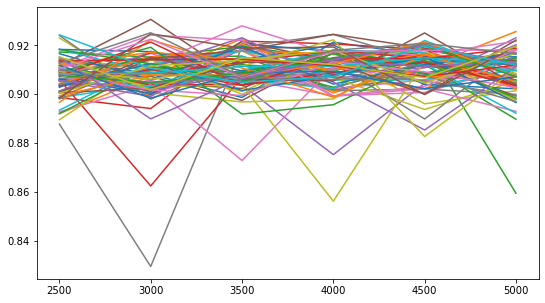

In [18]:
fig, ax = plt.subplots(figsize=(9,5))

for i in range(len(b_list)):
    for j in range(len(c_list)):
        for k in range(len(d_list)):
#             print(i, j, k)
            ax.plot(a_list, r2_list[k][j][i])
            print(r2_list[k][j][4])

### Dictionary Saving

In [19]:
import pickle
with open('r2_score dictionary.pkl','wb') as f:
    pickle.dump(r2_dict_2,f)

with open('COV dictionary.pkl','wb') as f:
    pickle.dump(cov_dict_2,f)

In [20]:
with open('r2_score dictionary.pkl','rb') as f:
    r2_score_practice = pickle.load(f)
    
with open('COV dictionary.pkl','rb') as f:
    cov_practice = pickle.load(f)

### 1개의 plot에 대한 r2, cov 그래프 & 6개의 subplot에 대한 r2, cov의 그래프

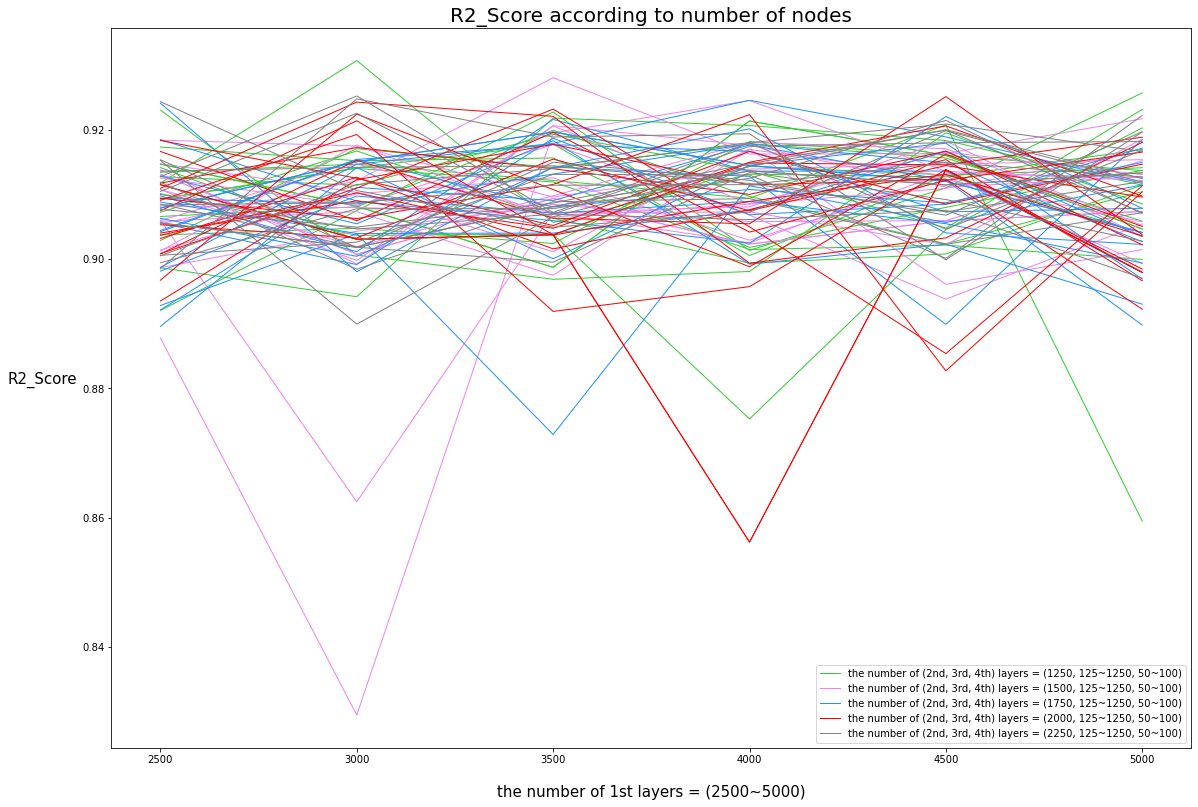

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2.5])

for j in range(len(c_list)):
    for k in range(len(d_list)):
        ax.plot(a_list, r2_list[k][j][0], 'limegreen', linewidth = 1)

ax.plot(a_list,r2_list[0][0][0], 'limegreen', linewidth = 1, label = 'the number of (2nd, 3rd, 4th) layers = (1250, 125~1000, 50~100)')
        
for j in range(len(c_list)):
    for k in range(len(d_list)):
        ax.plot(a_list, r2_list[k][j][1], 'violet', linewidth = 1)

ax.plot(a_list,r2_list[0][0][1], 'violet', linewidth = 1, label = 'the number of (2nd, 3rd, 4th) layers = (1500, 125~1000, 50~100)')        
        
for j in range(len(c_list)):
    for k in range(len(d_list)):
        ax.plot(a_list, r2_list[k][j][2], 'dodgerblue', linewidth = 1)

ax.plot(a_list,r2_list[0][0][2], 'dodgerblue', linewidth = 1, label = 'the number of (2nd, 3rd, 4th) layers = (1750, 125~1000, 50~100)')        
        
for j in range(len(c_list)):
    for k in range(len(d_list)):
        ax.plot(a_list, r2_list[k][j][3], 'red', linewidth = 1)

ax.plot(a_list,r2_list[0][0][3], 'red', linewidth = 1, label = 'the number of (2nd, 3rd, 4th) layers = (2000, 125~1000, 50~100)')        
        
for j in range(len(c_list)):
    for k in range(len(d_list)):
        ax.plot(a_list, r2_list[k][j][4], 'grey', linewidth = 1)    

ax.plot(a_list,r2_list[0][0][4], 'grey', linewidth = 1, label = 'the number of (2nd, 3rd, 4th) layers = (2250, 125~1000, 50~100)')        
        
ax.set_title("R2_Score according to number of nodes", fontsize = 20)
ax.set_xlabel('the number of 1st layers = (2500~5000)', fontsize = 15, labelpad = 20)
ax.set_ylabel('R2_Score', fontsize = 15, rotation = 0, labelpad = 40)
ax.legend()
plt.show()

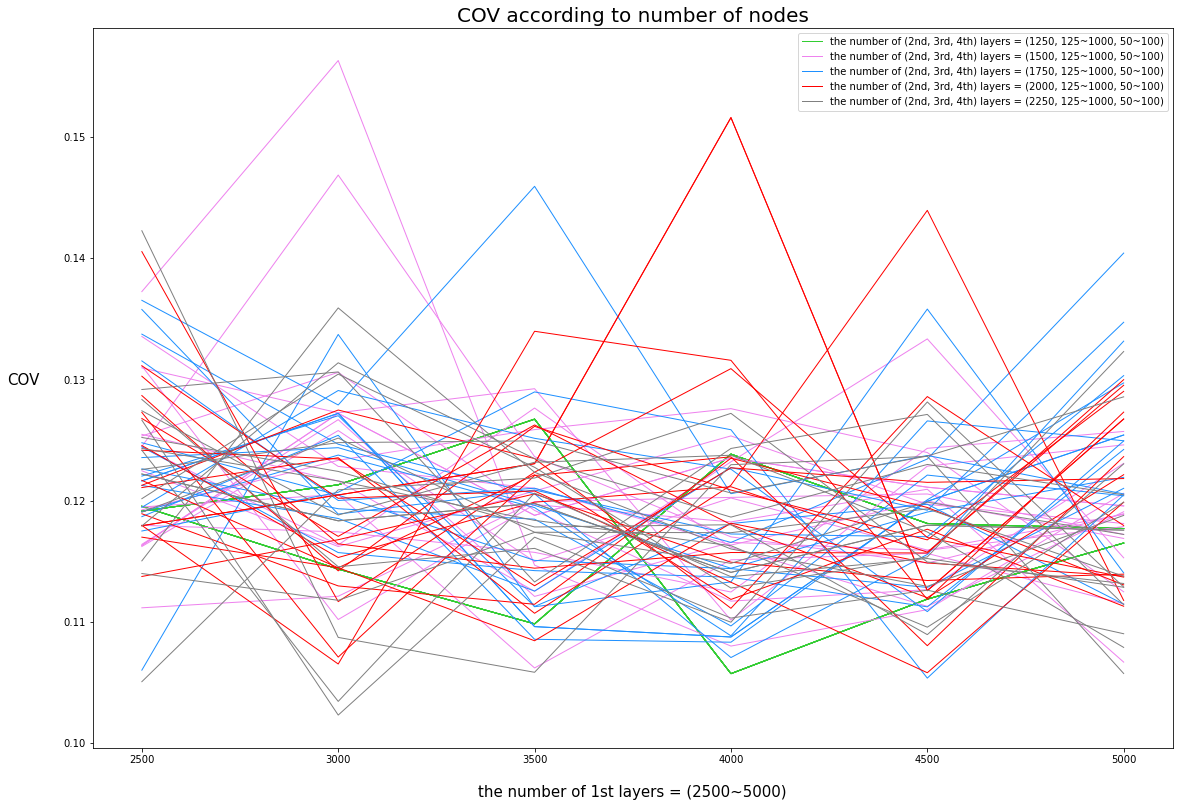

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2.5])

for j in range(len(c_list)):
    for k in range(len(d_list)):
        ax.plot(a_list, cov_list[k][0][0], 'limegreen', linewidth = 1)

ax.plot(a_list,cov_list[0][0][0], 'limegreen', linewidth = 1, label = 'the number of (2nd, 3rd, 4th) layers = (1250, 125~1000, 50~100)')
        
for j in range(len(c_list)):
    for k in range(len(d_list)):
        ax.plot(a_list, cov_list[k][j][1], 'violet', linewidth = 1)

ax.plot(a_list,cov_list[0][0][1], 'violet', linewidth = 1, label = 'the number of (2nd, 3rd, 4th) layers = (1500, 125~1000, 50~100)')        
        
for j in range(len(c_list)):
    for k in range(len(d_list)):
        ax.plot(a_list, cov_list[k][j][2], 'dodgerblue', linewidth = 1)

ax.plot(a_list,cov_list[0][0][2], 'dodgerblue', linewidth = 1, label = 'the number of (2nd, 3rd, 4th) layers = (1750, 125~1000, 50~100)')        
        
for j in range(len(c_list)):
    for k in range(len(d_list)):
        ax.plot(a_list, cov_list[k][j][3], 'red', linewidth = 1)

ax.plot(a_list,cov_list[0][0][3], 'red', linewidth = 1, label = 'the number of (2nd, 3rd, 4th) layers = (2000, 125~1000, 50~100)')        
        
for j in range(len(c_list)):
    for k in range(len(d_list)):
        ax.plot(a_list, cov_list[k][j][4], 'grey', linewidth = 1)    

ax.plot(a_list,cov_list[0][0][4], 'grey', linewidth = 1, label = 'the number of (2nd, 3rd, 4th) layers = (2250, 125~1000, 50~100)')        
        
ax.set_title("COV according to number of nodes", fontsize = 20)
ax.set_xlabel('the number of 1st layers = (2500~5000)', fontsize = 15, labelpad = 20)
ax.set_ylabel('COV', fontsize = 15, rotation = 0, labelpad = 40)

ax.legend()
plt.show()

In [66]:
print(list(b_list))
print(list(c_list))

[1250, 1500, 1750, 2000, 2250]
[125, 250, 375, 500, 625, 750, 875, 1000]


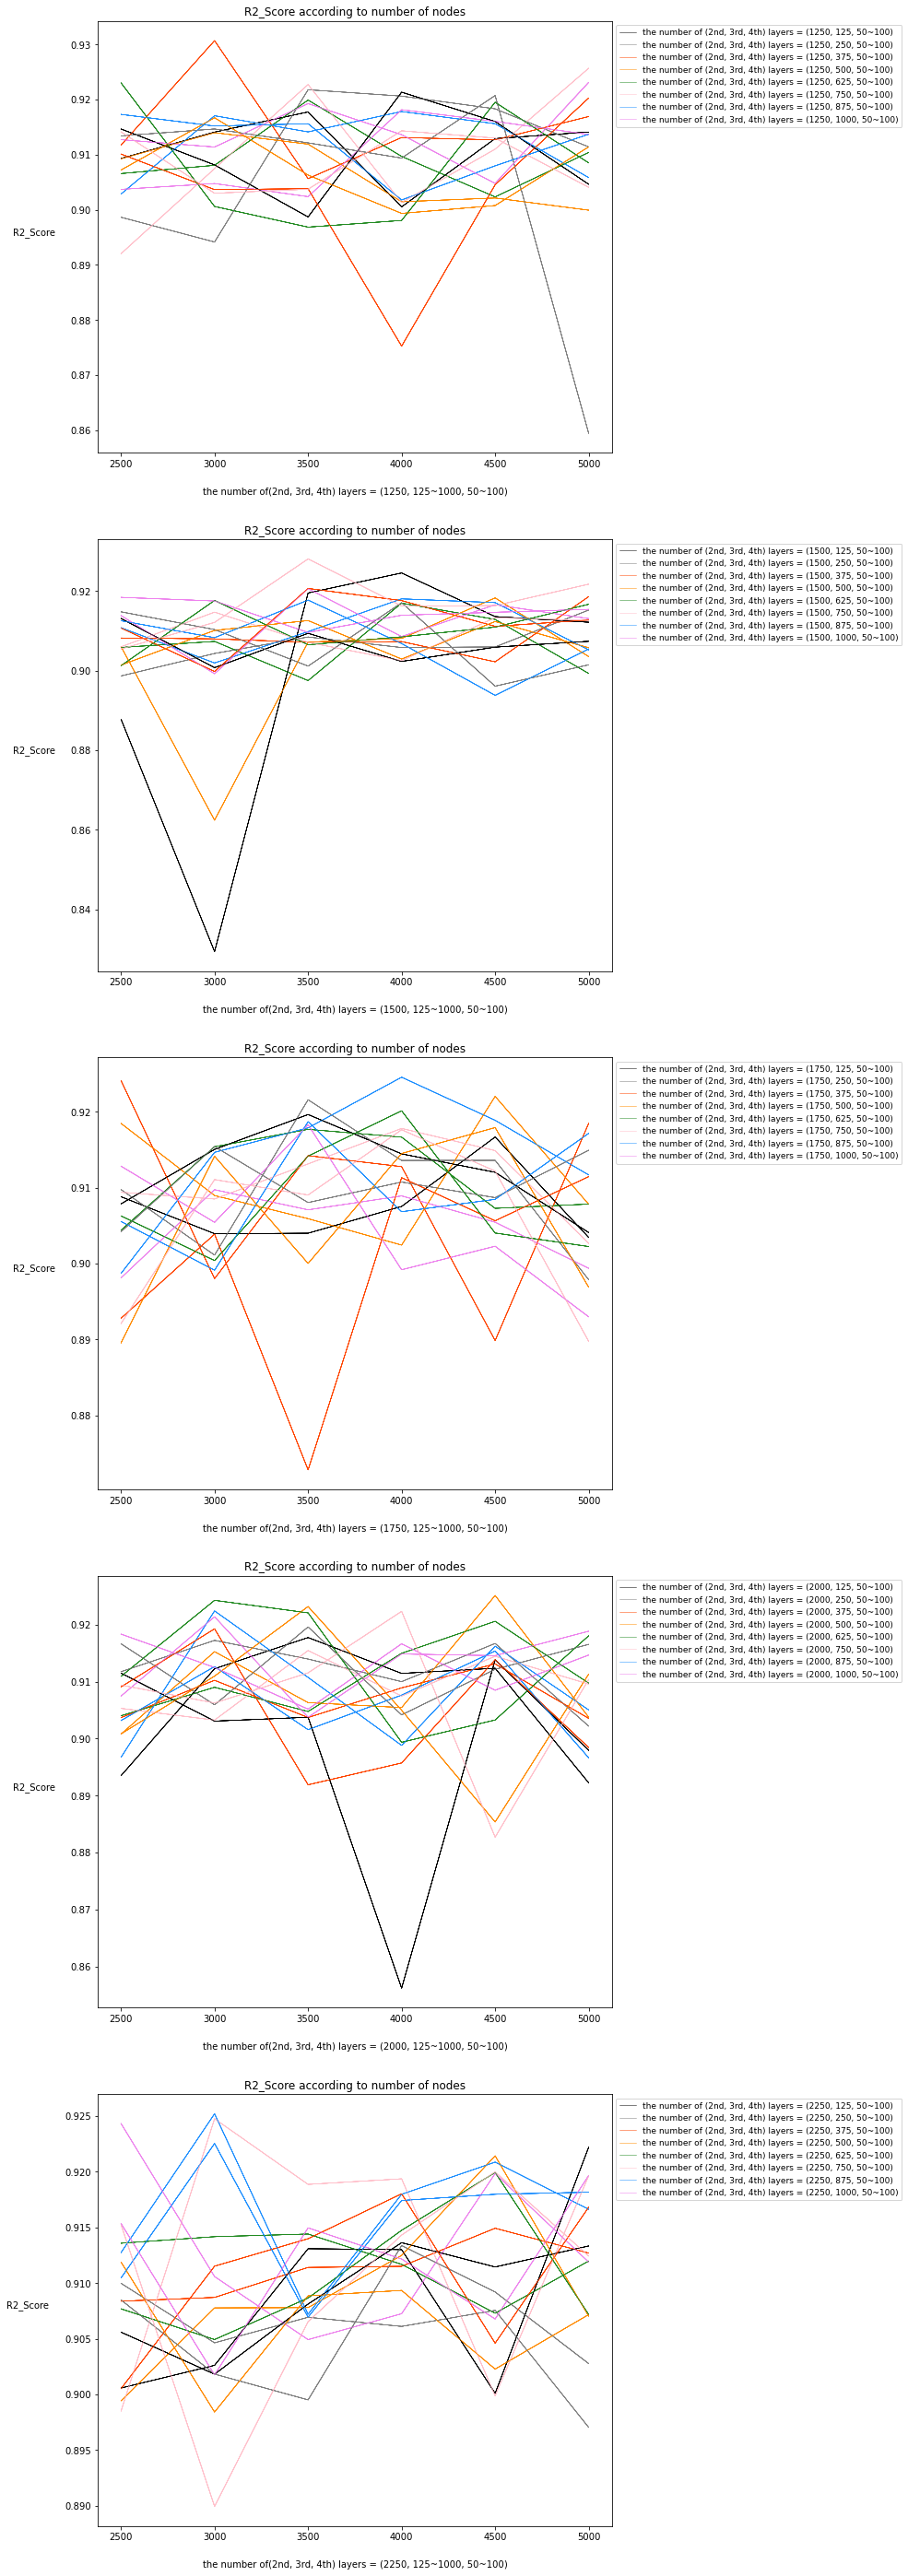

In [94]:
fig, ax = plt.subplots(5,1, figsize=(10, 50))
y = [0, 0, 0, 0, 0, 0]
     
for i in range(0,5):
    for j in range(len(c_list)):
        for k in range(len(d_list)):
            ax[i].plot(a_list, r2_list[k][0][i], 'black', linewidth = 0.5)
            ax[i].plot(a_list, r2_list[k][1][i], 'grey', linewidth = 0.5)
            ax[i].plot(a_list, r2_list[k][2][i], 'orangered', linewidth = 0.5)
            ax[i].plot(a_list, r2_list[k][3][i], 'darkorange', linewidth = 0.5)
            ax[i].plot(a_list, r2_list[k][4][i], 'forestgreen', linewidth = 0.5)
            ax[i].plot(a_list, r2_list[k][5][i], 'pink', linewidth = 0.5)
            ax[i].plot(a_list, r2_list[k][6][i], 'dodgerblue', linewidth = 0.5)
            ax[i].plot(a_list, r2_list[k][7][i], 'violet', linewidth = 0.5)            


for i in range(0,5):
    ax[i].plot(a_list,r2_list[0][0][i], 'black', linewidth = 0.5, label = 'the number of (2nd, 3rd, 4th) layers = (%d, 125, 50~100)' %list(b_list)[i])
    ax[i].plot(a_list,r2_list[0][1][i], 'grey', linewidth = 0.5, label = 'the number of (2nd, 3rd, 4th) layers = (%d, 250, 50~100)' %list(b_list)[i])
    ax[i].plot(a_list,r2_list[0][2][i], 'orangered', linewidth = 0.5, label = 'the number of (2nd, 3rd, 4th) layers = (%d, 375, 50~100)' %list(b_list)[i])
    ax[i].plot(a_list,r2_list[0][3][i], 'darkorange', linewidth = 0.5, label = 'the number of (2nd, 3rd, 4th) layers = (%d, 500, 50~100)' %list(b_list)[i])
    ax[i].plot(a_list,r2_list[0][4][i], 'forestgreen', linewidth = 0.5, label = 'the number of (2nd, 3rd, 4th) layers = (%d, 625, 50~100)' %list(b_list)[i])
    ax[i].plot(a_list,r2_list[0][5][i], 'pink', linewidth = 0.5, label = 'the number of (2nd, 3rd, 4th) layers = (%d, 750, 50~100)' %list(b_list)[i])
    ax[i].plot(a_list,r2_list[0][6][i], 'dodgerblue', linewidth = 0.5, label = 'the number of (2nd, 3rd, 4th) layers = (%d, 875, 50~100)' %list(b_list)[i])
    ax[i].plot(a_list,r2_list[0][7][i], 'violet', linewidth = 0.5, label = 'the number of (2nd, 3rd, 4th) layers = (%d, 1000, 50~100)' %list(b_list)[i])



for i in range(0,5):
        ax[i].legend(bbox_to_anchor=(1, 0.8, 0.3, 0.2), loc='upper left', fontsize=9)

for i in range(0,5):
    ax[i].set_xlabel('the number of(2nd, 3rd, 4th) layers = (%d, 125~1000, 50~100)' %list(b_list)[i], labelpad = 20)
    ax[i].set_ylabel('R2_Score', rotation = 0,  labelpad = 40)
    ax[i].set_title('R2_Score according to number of nodes')

plt.show()

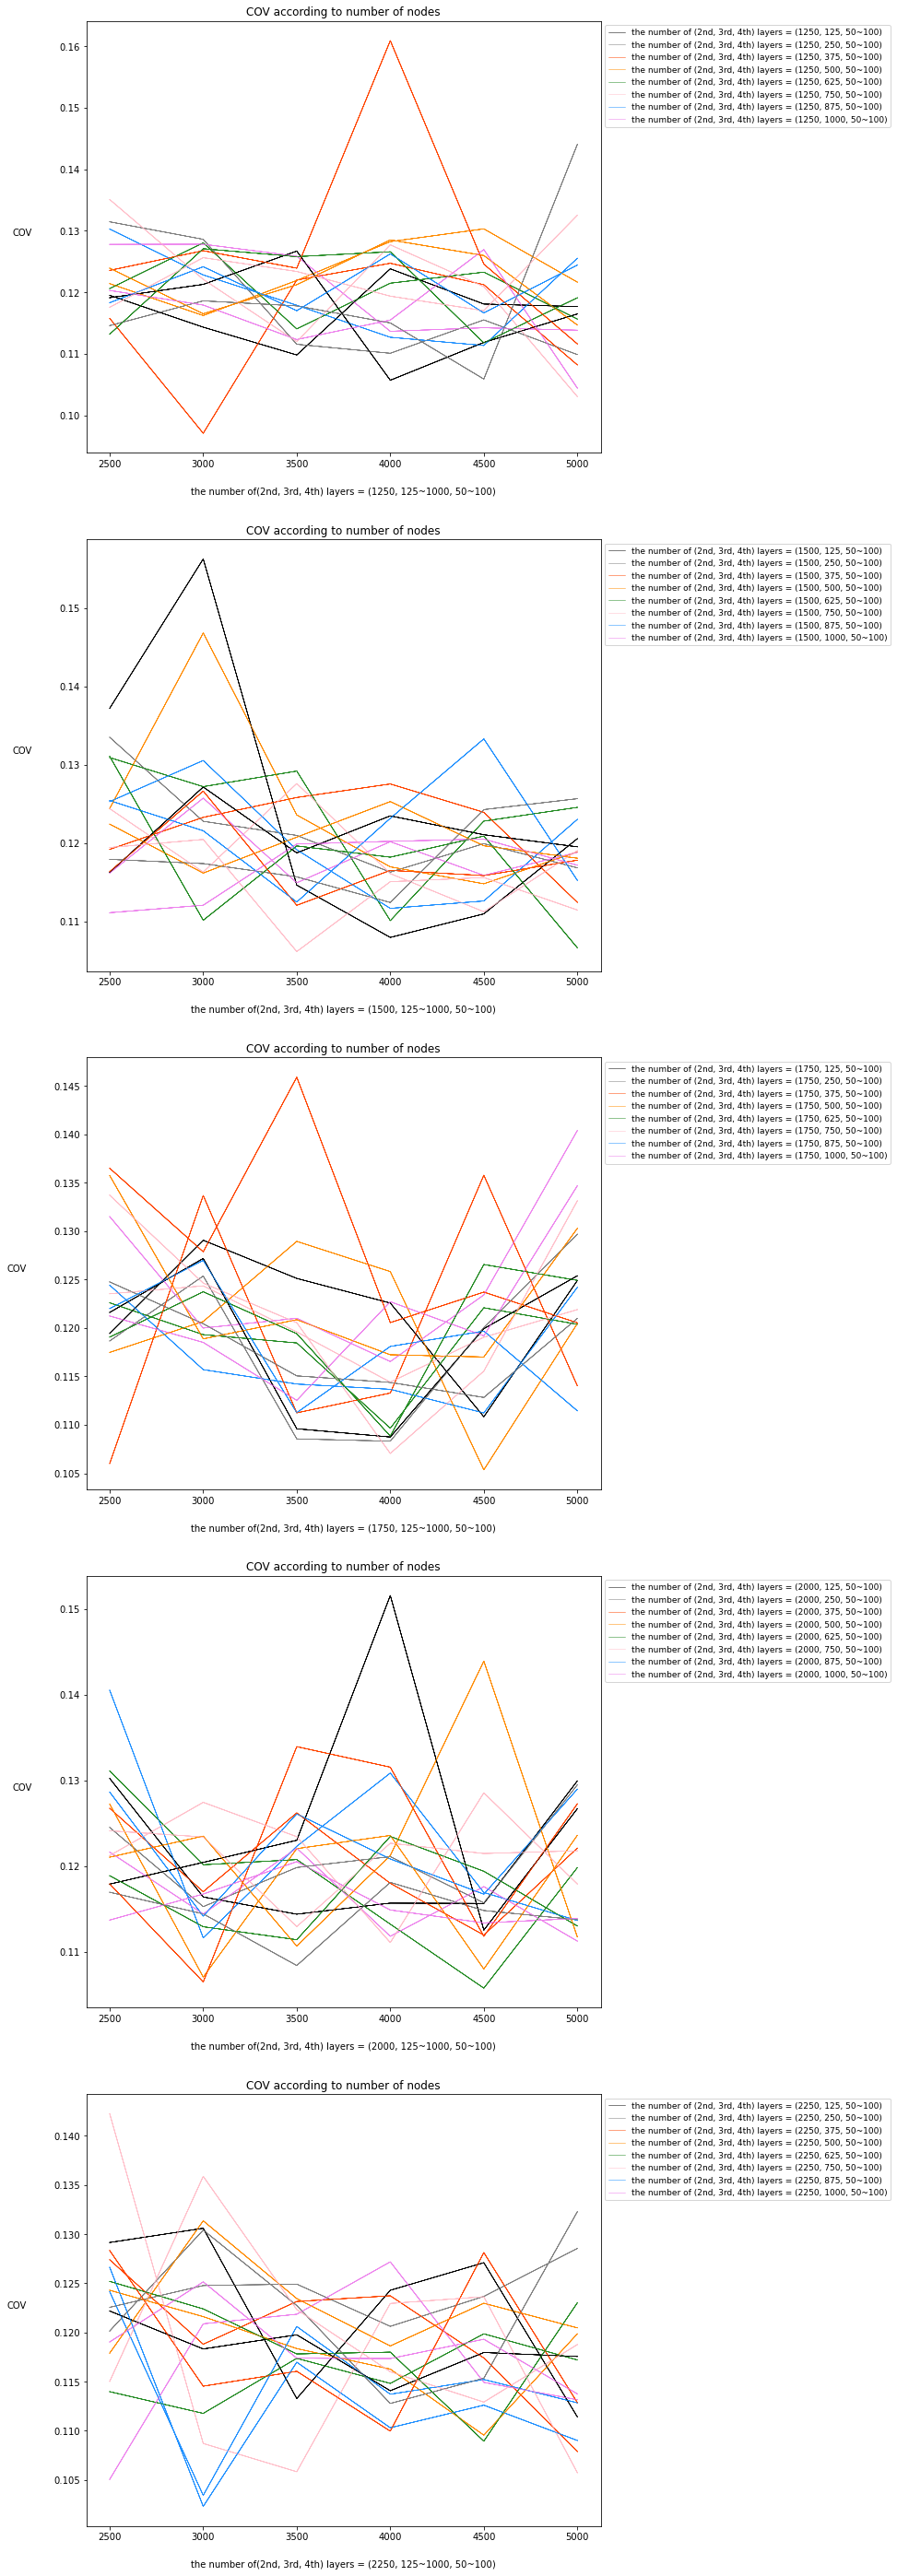

In [95]:
fig, ax = plt.subplots(5,1, figsize=(10, 50))
y = [0, 0, 0, 0, 0, 0]
     
for i in range(0,5):
    for j in range(len(c_list)):
        for k in range(len(d_list)):
            ax[i].plot(a_list, cov_list[k][0][i], 'black', linewidth = 0.5)
            ax[i].plot(a_list, cov_list[k][1][i], 'grey', linewidth = 0.5)
            ax[i].plot(a_list, cov_list[k][2][i], 'orangered', linewidth = 0.5)
            ax[i].plot(a_list, cov_list[k][3][i], 'darkorange', linewidth = 0.5)
            ax[i].plot(a_list, cov_list[k][4][i], 'forestgreen', linewidth = 0.5)
            ax[i].plot(a_list, cov_list[k][5][i], 'pink', linewidth = 0.5)
            ax[i].plot(a_list, cov_list[k][6][i], 'dodgerblue', linewidth = 0.5)
            ax[i].plot(a_list, cov_list[k][7][i], 'violet', linewidth = 0.5)            


for i in range(0,5):
    ax[i].plot(a_list,cov_list[0][0][i], 'black', linewidth = 0.5, label = 'the number of (2nd, 3rd, 4th) layers = (%d, 125, 50~100)' %list(b_list)[i])
    ax[i].plot(a_list,cov_list[0][1][i], 'grey', linewidth = 0.5, label = 'the number of (2nd, 3rd, 4th) layers = (%d, 250, 50~100)' %list(b_list)[i])
    ax[i].plot(a_list,cov_list[0][2][i], 'orangered', linewidth = 0.5, label = 'the number of (2nd, 3rd, 4th) layers = (%d, 375, 50~100)' %list(b_list)[i])
    ax[i].plot(a_list,cov_list[0][3][i], 'darkorange', linewidth = 0.5, label = 'the number of (2nd, 3rd, 4th) layers = (%d, 500, 50~100)' %list(b_list)[i])
    ax[i].plot(a_list,cov_list[0][4][i], 'forestgreen', linewidth = 0.5, label = 'the number of (2nd, 3rd, 4th) layers = (%d, 625, 50~100)' %list(b_list)[i])
    ax[i].plot(a_list,cov_list[0][5][i], 'pink', linewidth = 0.5, label = 'the number of (2nd, 3rd, 4th) layers = (%d, 750, 50~100)' %list(b_list)[i])
    ax[i].plot(a_list,cov_list[0][6][i], 'dodgerblue', linewidth = 0.5, label = 'the number of (2nd, 3rd, 4th) layers = (%d, 875, 50~100)' %list(b_list)[i])
    ax[i].plot(a_list,cov_list[0][7][i], 'violet', linewidth = 0.5, label = 'the number of (2nd, 3rd, 4th) layers = (%d, 1000, 50~100)' %list(b_list)[i])



for i in range(0,5):
        ax[i].legend(bbox_to_anchor=(1, 0.8, 0.3, 0.2), loc='upper left', fontsize=9)

for i in range(0,5):
    ax[i].set_xlabel('the number of(2nd, 3rd, 4th) layers = (%d, 125~1000, 50~100)' %list(b_list)[i], labelpad = 20)
    ax[i].set_ylabel('COV', rotation = 0,  labelpad = 40)
    ax[i].set_title('COV according to number of nodes')

plt.show()